# Borrador TFM 
## Análisis para el mantenimiento preventivo en autobuses
#### Alumno : Daniel Gómez Ramírez
#### Tutor Trabajo Fin de Máster: Peralta Martín-Palomino, Arturo
     


# Resumen
En el presente TFM se analizará un dataset con datos sobre diferentes reparaciones en piezas de autobuses. Dependiendo de la pieza del autobús, la reparación se lleva a cabo dentro de un periodo de tiempo. Se pretende realizar una predicción de ese tiempo estimado para así, ahorrar costes y prevenir problemas futuros.

Debido a que uno de los dispositivos de recopilación de datos no ha registrado datos correctamente, para poder predecir si, la avería es por el motor, para poder tener una cantidad de datos razonables, por encima de 1000 observaciones, se han de reducir las características, en las cuales, uno de los dispositivos no ha registrado datos.

En un principio se esperaba plantear un ejercicio de regresión para averiguar el numero de días de después de varias pruebas, las cuales se explicaran a lo largo del Analisis, se ha decidido, con ayuda de criterio experto que es preferible que se plantee como un problema de clasificación, creando 3 grupos ‘de 0 a 2 meses’, de 2 a 6 meses’, ‘mas de 6 meses’ ya que, a los 6 meses un autobús ha de pasar la ITV.

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

from feature_selector import FeatureSelector 
#import vlc
# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns
#print(df.shape)

import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)

Ruta actual de trabajo C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\Operaciones


#### Dataset  talleres
**ide_ope**: id operación
**nomopera**: nombre de la operación que se realiza en la reparación   
**aliasemp**: nombre del empleado que hizo la reparación   
**nomempresa**: Nombre de la empresa que repara el vehiculo que forma parte del grupo   
**taller_prove**: Nombre de la empresa externa que repara el vehiculo   
**v_codibud**: codigo del autobus   
**v_edad**: Edad del autobus   
**ndias_ant**: día desde la anterior reparación   
**capacidad**: capacidad dle vehiculo   
**marca**: Marca del vehiculo   
**modelo**: Modelo del vehiculo   
**potencia**: potencia dle vehiculo   
**tipo**: depende del  uso y el modelo del vehiculo   
**subtipo**: depende de la longitud y la capcidad dle vehiculo  
**dispositivo**: dispositivo recopilación datos telemetria
**subarea**: agrupación de operaciones relacionadas
**fechaope**: fecha de la operación
**fecha_ent**: fecha entrada en taller

In [2]:
pd.options.display.max_rows=60


pd.options.display.max_columns=50


# Carga de los datos

In [3]:
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_Nant_560_480.csv',sep=';')
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_all_acc1.csv',sep=';')

df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_mix_560_480.csv',sep=';')
print(df.shape)
df

(12516, 33)


,id_ope,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fechaope,fecha_ent,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
0,71169,B116,13,ALEJANDRO,480 top,Aire acondicionado,Climatización,2016-09-09,2016-09-07,10,129,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
1,71170,B116,13,ALEJANDRO,480 top,Cambio o limpieza prefiltro gasoil,Gasoil,2016-09-09,2016-09-07,10,4905,355.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
2,71171,B116,13,ALEJANDRO,480 top,Compresor a.a,Climatización,2016-09-09,2016-09-07,10,235,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
3,71172,B116,13,ALEJANDRO,480 top,Valvulas a.a,Climatización,2016-09-09,2016-09-07,10,4905,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
4,72010,B116,13,GUILLERMO,480 top,Tapacubos,Ruedas,2016-09-29,2016-09-29,7,335,62.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,2091.02,890.40,NaN,NaN,NaN,0.0,0.0,2455.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,165626,H099,12,BERMEJO,480 top,Retrovisor derecho,Carrocería,2021-09-21,2021-09-21,13,55,55.0,52,MAN,CITTOUR,12.85,12310.0,10518.0,228.0,Urbano,Normal,76208.76,30849.32,0.0,0.0,NaN,0.0,0.0,55597.00,0.00,NaN,NaN,NaN
12512,165627,H132,2,NaN,480 top,Fallo en AVS,Fallo en AVS,2021-09-22,2021-09-21,6,671,NaN,29,MERCEDES BENZ,DYPARRO,8.79,4960.0,2987.0,140.0,Discrecional,Microbus,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN
12513,165628,H109,14,ALEJANDRO,480 top,Aire acondicionado,Climatización,2021-09-21,2021-09-21,5,5,5.0,66,SCANIA,HABIT,10.58,10689.0,8867.0,169.0,Urbano,Midibus,177620.78,80422.08,0.0,0.0,NaN,0.0,0.0,202801.00,0.00,NaN,NaN,NaN
12514,165637,T340,3,NaN,560,Luces exteriores,Luces,2021-09-21,2021-09-21,21,1110,91.0,45,MAN,LION'S COACH L,13.90,15202.0,12419.0,338.0,Discrecional,Normal,126937.48,38326.00,16100.0,37149.0,5598.0,742821.0,742332.0,54426.36,104922.13,1371.36,31.375935,1.21


# Limpieza de creación de variables sinteticas
 
 se crean los rangos  se serán la variable objetivo a predecir

In [4]:
df['tiempos'] = np.where(df['ndias_ant_subarea']<=60, ' de 0 a 2 meses', '0')
df['tiempos'] = np.where(((df['ndias_ant_subarea']>60) & (df['ndias_ant_subarea']<=180)), 'de 2 a 6 meses', df['tiempos'])
df['tiempos'] = np.where(df['ndias_ant_subarea']>180, 'mas de 6 mese', df['tiempos'])

In [5]:
df

,id_ope,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fechaope,fecha_ent,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),tiempos
0,71169,B116,13,ALEJANDRO,480 top,Aire acondicionado,Climatización,2016-09-09,2016-09-07,10,129,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN,de 2 a 6 meses
1,71170,B116,13,ALEJANDRO,480 top,Cambio o limpieza prefiltro gasoil,Gasoil,2016-09-09,2016-09-07,10,4905,355.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN,mas de 6 mese
2,71171,B116,13,ALEJANDRO,480 top,Compresor a.a,Climatización,2016-09-09,2016-09-07,10,235,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN,de 2 a 6 meses
3,71172,B116,13,ALEJANDRO,480 top,Valvulas a.a,Climatización,2016-09-09,2016-09-07,10,4905,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN,de 2 a 6 meses
4,72010,B116,13,GUILLERMO,480 top,Tapacubos,Ruedas,2016-09-29,2016-09-29,7,335,62.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,2091.02,890.40,NaN,NaN,NaN,0.0,0.0,2455.00,NaN,NaN,NaN,NaN,de 2 a 6 meses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,165626,H099,12,BERMEJO,480 top,Retrovisor derecho,Carrocería,2021-09-21,2021-09-21,13,55,55.0,52,MAN,CITTOUR,12.85,12310.0,10518.0,228.0,Urbano,Normal,76208.76,30849.32,0.0,0.0,NaN,0.0,0.0,55597.00,0.00,NaN,NaN,NaN,de 0 a 2 meses
12512,165627,H132,2,NaN,480 top,Fallo en AVS,Fallo en AVS,2021-09-22,2021-09-21,6,671,NaN,29,MERCEDES BENZ,DYPARRO,8.79,4960.0,2987.0,140.0,Discrecional,Microbus,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,0
12513,165628,H109,14,ALEJANDRO,480 top,Aire acondicionado,Climatización,2021-09-21,2021-09-21,5,5,5.0,66,SCANIA,HABIT,10.58,10689.0,8867.0,169.0,Urbano,Midibus,177620.78,80422.08,0.0,0.0,NaN,0.0,0.0,202801.00,0.00,NaN,NaN,NaN,de 0 a 2 meses
12514,165637,T340,3,NaN,560,Luces exteriores,Luces,2021-09-21,2021-09-21,21,1110,91.0,45,MAN,LION'S COACH L,13.90,15202.0,12419.0,338.0,Discrecional,Normal,126937.48,38326.00,16100.0,37149.0,5598.0,742821.0,742332.0,54426.36,104922.13,1371.36,31.375935,1.21,de 2 a 6 meses


Comprobación de que tipo es cada variable

In [6]:
df.dtypes

id_ope                       int64
v_codigbus                  object
v_edad                       int64
aliasemp                    object
dispositivo                 object
nomopera                    object
subarea                     object
fechaope                    object
fecha_ent                   object
ndias_ant                    int64
ndias_ant_tipo               int64
ndias_ant_subarea          float64
capacidad                    int64
marca                       object
modelo                      object
longitud                   float64
tara                       float64
cilindrada                 float64
potencia                   float64
tipo                        object
subtipo                     object
sum(c.`distancia`)         float64
sum(c.`litros_totales`)    float64
sum(c.`frenazos`)          float64
sum(c.`exc_rpm`)           float64
sum(c.`exc_temp`)          float64
sum(c.`metros_asc`)        float64
sum(c.`metros_desc`)       float64
sum(c.`min_ral`)    

cambiamos las variables  con fechas a tipo fecha

In [7]:
df['fechaope'] = pd.to_datetime(df['fechaope'])
df['fecha_ent'] = pd.to_datetime(df['fecha_ent'])

In [8]:
len(df.columns)

34

analizamos de forma descriptiva los datos y se observa que  hay valores  que no son consitentes como ndias_ant y ndias_ant_tipo

In [9]:
df.describe()

,id_ope,v_edad,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
count,12516.000000,12516.00000,12516.000000,12516.000000,11429.000000,12516.000000,11960.000000,11960.000000,11960.000000,11960.000000,12516.000000,12516.000000,4630.000000,4630.000000,2178.000000,1.251600e+04,1.251600e+04,12516.000000,4543.000000,2091.000000,2091.000000,2091.000000
mean,123117.901326,10.77333,27.571668,910.735698,220.836294,50.375599,12.166543,12712.600167,10155.351672,274.542224,42433.973138,13798.487542,4123.720086,8503.187689,1801.703398,9.526851e+04,9.527310e+04,23469.201516,20559.440737,2495.191368,26.960644,1423.338565
std,30185.777066,4.23989,192.942513,1465.048172,331.687140,13.851577,1.682674,2731.889872,2625.136435,60.819321,56499.619227,29208.086862,8794.003015,15531.204344,5528.648891,2.973561e+05,2.976287e+05,32759.713771,43081.909024,5811.740591,15.971304,5111.130282
min,71169.000000,0.00000,-100.000000,-100.000000,1.000000,8.000000,6.700000,2900.000000,2148.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97006.750000,8.00000,4.000000,42.000000,27.000000,43.000000,12.000000,12320.000000,8867.000000,228.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,129.990000,22.256364,1.245000
50%,111062.500000,11.00000,9.000000,270.000000,92.000000,55.000000,12.800000,13349.000000,10640.000000,290.000000,19309.600000,5225.435000,1.000000,0.000000,211.000000,0.000000e+00,0.000000e+00,9093.000000,0.000000,794.300000,29.222898,10.970000
75%,156209.250000,14.00000,20.000000,1017.000000,269.000000,55.000000,12.920000,13755.000000,11967.000000,320.000000,65613.150000,21049.500000,4485.750000,10474.750000,1283.000000,0.000000e+00,0.000000e+00,34536.527500,24469.740000,1897.235000,35.504620,262.375000
max,165640.000000,20.00000,6166.000000,7234.000000,3814.000000,103.000000,15.000000,19050.000000,12902.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,220381.000000,415635.340000,36108.490000,98.294243,40038.900000


In [10]:
df.columns

Index(['id_ope', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fechaope', 'fecha_ent', 'ndias_ant', 'ndias_ant_tipo',
       'ndias_ant_subarea', 'capacidad', 'marca', 'modelo', 'longitud', 'tara',
       'cilindrada', 'potencia', 'tipo', 'subtipo', 'sum(c.`distancia`)',
       'sum(c.`litros_totales`)', 'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)',
       'sum(c.`exc_temp`)', 'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)',
       'sum(c.`min_ral`)', 'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)',
       'AVG(c.`inercia`)', 'sum(c.`kickdown`)', 'tiempos'],
      dtype='object')

eliminamos las columnas que nos aportan valor

In [11]:
df = df.drop('id_ope', 1)
df = df.drop('fechaope', 1)
#df = df.drop('f_inicio', 1)
df = df.drop('ndias_ant', 1)
df = df.drop('ndias_ant_tipo', 1)
#df = df.drop('ndias_ant_subarea', 1)
len(df.columns)

C:\Users\Dani\AppData\Local\Temp/ipykernel_1132/894264480.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('id_ope', 1)


30

Para poder crear  una nueva variable  que sea consistente con los datos  del numerod e dias  que an pasado desde la anterior reparión por autobus  se ordenan los datos por fecha de entrada a taller y por el codigo de autobus y se resetea el indice

In [12]:
df=df.sort_values(['fecha_ent','v_codigbus'])

df.head(50)
df = df.reset_index(drop=True)

y creamos  las distintas variables de apoyo para poder crear la variable dias_ant

In [13]:
df['fecha_ant']=(df.groupby(['v_codigbus'])['fecha_ent'].shift(1))#- df['fechaope']).shift(-1)
df['dias'] =  (df['fecha_ent'] - df['fecha_ant']).dt.days

df=df.sort_values(['v_codigbus','fecha_ent'])
df.reset_index(inplace=True)
df['match'] = df.v_codigbus.eq(df.v_codigbus.shift())

df['dias_ant'] = np.where(((df['dias']==0)&(df['match']==True)),df['dias'].replace(to_replace=0, method='ffill').values,df['dias'])
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),tiempos,fecha_ant,dias,match,dias_ant
0,10287,58HC,16,TONI,480 top,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,mas de 6 mese,NaT,NaN,False,NaN
1,10593,58HC,16,ADRIAN,480 top,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,0,2021-04-15,20.0,True,20.0
2,10594,58HC,16,YEVHEN,480 top,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,de 0 a 2 meses,2021-05-05,0.0,True,20.0
3,11378,58HC,16,,480 top,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,mas de 6 mese,2021-05-05,43.0,True,43.0
4,11626,58HC,16,,480 top,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,de 2 a 6 meses,2021-06-17,18.0,True,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,NaN,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,de 0 a 2 meses,2021-08-25,1.0,True,1.0
12512,9387,X119,5,RODRIGUEZ,480 top,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 0 a 2 meses,NaT,NaN,False,NaN
12513,9615,X119,5,BERMEJO,480 top,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-01,18.0,True,18.0
12514,11764,X119,5,NaN,480 top,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-19,144.0,True,144.0


creamos tambien al variable subarea_ant para poder conocer en cada observación por que motivo estuvo el autobus anteriormente en el taller

In [14]:
df['subarea_ant']=(df.groupby(['v_codigbus'])['subarea'].shift(1))


volvemos a ver de forma descriptiva  com se distribuyen ahora los datos, y vemos que  que tenemos muchos 0 en  una gran cantidad de varibles, por lo que se pretende buscar el motivo.

In [15]:
df.describe()

,index,v_edad,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias,dias_ant
count,12516.000000,12516.00000,11429.000000,12516.000000,11960.000000,11960.000000,11960.000000,11960.000000,12516.000000,12516.000000,4630.000000,4630.000000,2178.000000,1.251600e+04,1.251600e+04,12516.000000,4543.000000,2091.000000,2091.000000,2091.000000,12288.000000,12192.000000
mean,6257.500000,10.77333,220.836294,50.375599,12.166543,12712.600167,10155.351672,274.542224,42433.973138,13798.487542,4123.720086,8503.187689,1801.703398,9.526851e+04,9.527310e+04,23469.201516,20559.440737,2495.191368,26.960644,1423.338565,17.655029,27.106873
std,3613.202319,4.23989,331.687140,13.851577,1.682674,2731.889872,2625.136435,60.819321,56499.619227,29208.086862,8794.003015,15531.204344,5528.648891,2.973561e+05,2.976287e+05,32759.713771,43081.909024,5811.740591,15.971304,5111.130282,47.495744,59.679721
min,0.000000,0.00000,1.000000,8.000000,6.700000,2900.000000,2148.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3128.750000,8.00000,27.000000,43.000000,12.000000,12320.000000,8867.000000,228.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,129.990000,22.256364,1.245000,0.000000,5.000000
50%,6257.500000,11.00000,92.000000,55.000000,12.800000,13349.000000,10640.000000,290.000000,19309.600000,5225.435000,1.000000,0.000000,211.000000,0.000000e+00,0.000000e+00,9093.000000,0.000000,794.300000,29.222898,10.970000,5.000000,12.000000
75%,9386.250000,14.00000,269.000000,55.000000,12.920000,13755.000000,11967.000000,320.000000,65613.150000,21049.500000,4485.750000,10474.750000,1283.000000,0.000000e+00,0.000000e+00,34536.527500,24469.740000,1897.235000,35.504620,262.375000,17.000000,26.000000
max,12515.000000,20.00000,3814.000000,103.000000,15.000000,19050.000000,12902.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,220381.000000,415635.340000,36108.490000,98.294243,40038.900000,1263.000000,1263.000000


In [16]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),tiempos,fecha_ant,dias,match,dias_ant,subarea_ant
0,10287,58HC,16,TONI,480 top,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,mas de 6 mese,NaT,NaN,False,NaN,NaN
1,10593,58HC,16,ADRIAN,480 top,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,0,2021-04-15,20.0,True,20.0,Interior
2,10594,58HC,16,YEVHEN,480 top,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,de 0 a 2 meses,2021-05-05,0.0,True,20.0,ABS/EBS
3,11378,58HC,16,,480 top,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,mas de 6 mese,2021-05-05,43.0,True,43.0,Interior
4,11626,58HC,16,,480 top,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,de 2 a 6 meses,2021-06-17,18.0,True,18.0,Carrocería
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,NaN,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,de 0 a 2 meses,2021-08-25,1.0,True,1.0,Lunas
12512,9387,X119,5,RODRIGUEZ,480 top,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 0 a 2 meses,NaT,NaN,False,NaN,NaN
12513,9615,X119,5,BERMEJO,480 top,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-01,18.0,True,18.0,Sistema eléctrico
12514,11764,X119,5,NaN,480 top,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-19,144.0,True,144.0,Fuga de aire


se observa que el dispositivo 480 no ha registrado correctamente las mediciones    
se sige observando el data set en busca de posibles inconsistencias.

In [17]:
to_show=['fecha_ant','fecha_ent','dias','dias_ant','ndias_ant_subarea','v_codigbus','subarea', 'subarea_ant','v_edad']
df[to_show].head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
0,NaT,2021-04-15,NaN,NaN,386.0,58HC,Interior,NaN,16
1,2021-04-15,2021-05-05,20.0,20.0,NaN,58HC,ABS/EBS,Interior,16
2,2021-05-05,2021-05-05,0.0,20.0,20.0,58HC,Interior,ABS/EBS,16
3,2021-05-05,2021-06-17,43.0,43.0,449.0,58HC,Carrocería,Interior,16
4,2021-06-17,2021-07-05,18.0,18.0,61.0,58HC,Interior,Carrocería,16
5,2021-07-05,2021-07-22,17.0,17.0,225.0,58HC,Interior,Interior,16
6,2021-07-22,2021-08-04,13.0,13.0,1302.0,58HC,Fuelle,Interior,16
7,NaT,2021-02-12,NaN,NaN,2397.0,61HC,Fuelle,NaN,15
8,2021-02-12,2021-02-12,0.0,NaN,327.0,61HC,Sistema de transmisión,Fuelle,15
9,2021-02-12,2021-02-12,0.0,NaN,60.0,61HC,Motor,Sistema de transmisión,15


In [18]:
#df['dias'] = df['dias'].astype(int)
df.dtypes

index                               int64
v_codigbus                         object
v_edad                              int64
aliasemp                           object
dispositivo                        object
nomopera                           object
subarea                            object
fecha_ent                  datetime64[ns]
ndias_ant_subarea                 float64
capacidad                           int64
marca                              object
modelo                             object
longitud                          float64
tara                              float64
cilindrada                        float64
potencia                          float64
tipo                               object
subtipo                            object
sum(c.`distancia`)                float64
sum(c.`litros_totales`)           float64
sum(c.`frenazos`)                 float64
sum(c.`exc_rpm`)                  float64
sum(c.`exc_temp`)                 float64
sum(c.`metros_asc`)               

In [19]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
6334,NaT,2019-04-20,NaN,NaN,711.0,H114,Sistema eléctrico,NaN,5
6335,2019-04-20,2019-05-15,25.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6336,2019-05-15,2019-05-15,0.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6337,2019-05-15,2019-05-15,0.0,25.0,142.0,H114,Motor,Sistema eléctrico,5
6338,2019-05-15,2019-05-22,7.0,7.0,7.0,H114,Sistema eléctrico,Motor,5
6339,2019-05-22,2019-05-30,8.0,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
6340,2019-05-30,2019-06-25,26.0,26.0,183.0,H114,Carrocería,Sistema eléctrico,5
6341,2019-06-25,2019-06-25,0.0,26.0,183.0,H114,Carrocería,Carrocería,5
6342,2019-06-25,2019-06-28,3.0,3.0,3.0,H114,Carrocería,Carrocería,5
6343,2019-06-28,2019-10-25,119.0,119.0,163.0,H114,Motor,Carrocería,5


In [20]:
df.loc[(df['ndias_ant_subarea']>3000), to_show].sort_values('fecha_ent')

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
3402,2018-09-07,2018-09-07,0.0,94.0,3189.0,C088,ABS/EBS,Motor,11
3264,2019-05-28,2019-05-28,0.0,97.0,3813.0,C084,Alternador,Sistema eléctrico,15
1024,2019-07-10,2019-07-16,6.0,6.0,3668.0,B129,Alternador,Fuga de aire,13
3565,2020-10-06,2021-03-29,174.0,174.0,3814.0,C092,Alternador,Sistema de dirección,12
8711,2021-06-14,2021-07-01,17.0,17.0,3167.0,T259,Reglaje válvulas,Sistema eléctrico,13
8712,2021-07-01,2021-07-05,4.0,4.0,3134.0,T259,ABS/EBS,Reglaje válvulas,13


In [21]:
df.loc[(df.v_codigbus=='G084'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
4723,NaT,2020-10-02,NaN,NaN,161.0,G084,Lunas,NaN,3
4724,2020-10-02,2020-11-19,48.0,48.0,48.0,G084,Lunas,Lunas,3
4725,2020-11-19,2021-03-17,118.0,118.0,NaN,G084,Motor,Lunas,4
4726,2021-03-17,2021-03-17,0.0,118.0,519.0,G084,Adblue,Motor,4
4727,2021-03-17,2021-03-31,14.0,14.0,14.0,G084,Adblue,Adblue,4
4728,2021-03-31,2021-06-08,69.0,69.0,NaN,G084,Sistema de escape,Adblue,4
4729,2021-06-08,2021-08-20,73.0,73.0,683.0,G084,Pinchazo,Sistema de escape,4


In [22]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(20)

,fecha_ant,fecha_ent,dias,dias_ant,ndias_ant_subarea,v_codigbus,subarea,subarea_ant,v_edad
6334,NaT,2019-04-20,NaN,NaN,711.0,H114,Sistema eléctrico,NaN,5
6335,2019-04-20,2019-05-15,25.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6336,2019-05-15,2019-05-15,0.0,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
6337,2019-05-15,2019-05-15,0.0,25.0,142.0,H114,Motor,Sistema eléctrico,5
6338,2019-05-15,2019-05-22,7.0,7.0,7.0,H114,Sistema eléctrico,Motor,5
6339,2019-05-22,2019-05-30,8.0,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
6340,2019-05-30,2019-06-25,26.0,26.0,183.0,H114,Carrocería,Sistema eléctrico,5
6341,2019-06-25,2019-06-25,0.0,26.0,183.0,H114,Carrocería,Carrocería,5
6342,2019-06-25,2019-06-28,3.0,3.0,3.0,H114,Carrocería,Carrocería,5
6343,2019-06-28,2019-10-25,119.0,119.0,163.0,H114,Motor,Carrocería,5


se  corrigen los  nombres de los empleados y  se añade el nombre 'Sin asignar' a las variable sque no tenian asignado ningun empleado

In [23]:
df['aliasemp'] = df['aliasemp'].fillna('Sin asignar')
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('IKAÑI')),'IÑAKI',df['aliasemp'])
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('               ')),'Sin asignar',df['aliasemp'])

se modifica el nombre del dispositivo 480

In [24]:
df['dispositivo'] = np.where((df['dispositivo'].str.contains('480 top'))
                           ,'480',df['dispositivo'])

se crea una columna con el empleado que reparo la anterior avería

In [25]:
df['aliasemp_ant']=(df.groupby(['v_codigbus'])['aliasemp'].shift(1))

In [26]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),tiempos,fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,10287,58HC,16,TONI,480,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,mas de 6 mese,NaT,NaN,False,NaN,NaN,NaN
1,10593,58HC,16,ADRIAN,480,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,0,2021-04-15,20.0,True,20.0,Interior,TONI
2,10594,58HC,16,YEVHEN,480,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,de 0 a 2 meses,2021-05-05,0.0,True,20.0,ABS/EBS,ADRIAN
3,11378,58HC,16,Sin asignar,480,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,mas de 6 mese,2021-05-05,43.0,True,43.0,Interior,YEVHEN
4,11626,58HC,16,Sin asignar,480,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,de 2 a 6 meses,2021-06-17,18.0,True,18.0,Carrocería,Sin asignar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,Sin asignar,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,de 0 a 2 meses,2021-08-25,1.0,True,1.0,Lunas,JULIAN
12512,9387,X119,5,RODRIGUEZ,480,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 0 a 2 meses,NaT,NaN,False,NaN,NaN,NaN
12513,9615,X119,5,BERMEJO,480,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-01,18.0,True,18.0,Sistema eléctrico,RODRIGUEZ
12514,11764,X119,5,Sin asignar,480,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-19,144.0,True,144.0,Fuga de aire,BERMEJO


comprobamos las observaciones que tenemsode cada dispositivo y vemsoq ue tenemos 5 veces mas observaciones  del dispositivo 480 que del 560

In [27]:
df['dispositivo'].value_counts()

480    10376
560     2140
Name: dispositivo, dtype: int64

comprobamos el numeor de observaciones que tenemos de averias por motor

In [28]:
df['subarea'].value_counts()

Motor                                 1446
Climatización                         1349
Interior                              1300
Puertas                               1127
Sistema de refrigeración               724
Sistema eléctrico                      686
Ruedas                                 662
Luces                                  605
Carrocería                             591
Sistema de frenado                     589
Lunas                                  488
Fuga de aire                           447
Sistema de transmisión                 343
Fuelle                                 292
Sistema de dirección                   249
Alternador                             234
Gasoil                                 223
Bateria                                181
Sistema de amortiguación               172
Correas                                163
Reglaje válvulas                       118
Pinchazo                               113
Sistema de escape                       87
Fallo en AV

Observaciones: 12516
Atributos: 37


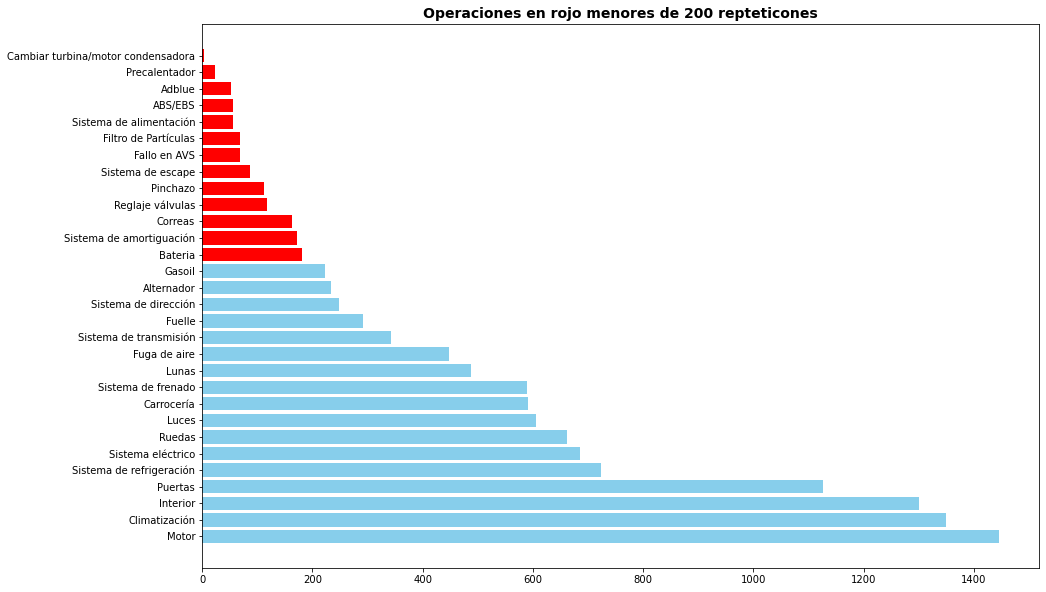

In [29]:
plt.figure(figsize=(15,10))
limite=200

x=df['subarea'].value_counts().index
y=df['subarea'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Operaciones en rojo menores de %d repteticones" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

print('Observaciones: '+str(df.shape[0])+'\n'+ 'Atributos: '+str(df.shape[1]))


In [30]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),tiempos,fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,10287,58HC,16,TONI,480,INTERIOR VEHÍCULO,Interior,2021-04-15,386.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,mas de 6 mese,NaT,NaN,False,NaN,NaN,NaN
1,10593,58HC,16,ADRIAN,480,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,NaN,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,0,2021-04-15,20.0,True,20.0,Interior,TONI
2,10594,58HC,16,YEVHEN,480,INTERIOR VEHÍCULO,Interior,2021-05-05,20.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,de 0 a 2 meses,2021-05-05,0.0,True,20.0,ABS/EBS,ADRIAN
3,11378,58HC,16,Sin asignar,480,PARAGOLPES DELANTERO,Carrocería,2021-06-17,449.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,mas de 6 mese,2021-05-05,43.0,True,43.0,Interior,YEVHEN
4,11626,58HC,16,Sin asignar,480,INTERIOR VEHÍCULO,Interior,2021-07-05,61.0,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,de 2 a 6 meses,2021-06-17,18.0,True,18.0,Carrocería,Sin asignar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,12192,X118,5,Sin asignar,560,Luna delantera,Lunas,2021-08-26,1.0,39,CUMMINS,C10,9.90,11470.0,6700.0,226.0,Discrecional,Midibus,58506.35,18161.00,8334.0,2815.0,3790.0,802840.0,801247.0,151.34,84419.58,6243.52,30.158597,1197.57,de 0 a 2 meses,2021-08-25,1.0,True,1.0,Lunas,JULIAN
12512,9387,X119,5,RODRIGUEZ,480,Instalaciones electricas,Sistema eléctrico,2021-02-01,18.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 0 a 2 meses,NaT,NaN,False,NaN,NaN,NaN
12513,9615,X119,5,BERMEJO,480,Fuga de aire,Fuga de aire,2021-02-19,177.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-01,18.0,True,18.0,Sistema eléctrico,RODRIGUEZ
12514,11764,X119,5,Sin asignar,480,Instalaciones electricas,Sistema eléctrico,2021-07-13,162.0,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,de 2 a 6 meses,2021-02-19,144.0,True,144.0,Fuga de aire,BERMEJO


In [31]:
df.columns

Index(['index', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fecha_ent', 'ndias_ant_subarea', 'capacidad', 'marca',
       'modelo', 'longitud', 'tara', 'cilindrada', 'potencia', 'tipo',
       'subtipo', 'sum(c.`distancia`)', 'sum(c.`litros_totales`)',
       'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)',
       'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)', 'sum(c.`min_ral`)',
       'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)',
       'sum(c.`kickdown`)', 'tiempos', 'fecha_ant', 'dias', 'match',
       'dias_ant', 'subarea_ant', 'aliasemp_ant'],
      dtype='object')

### comprobamos y eliminamos los missings

In [32]:


features=['v_codigbus', 'v_edad', 'aliasemp','aliasemp_ant','dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'subarea','subarea_ant','dias_ant','ndias_ant_subarea','tiempos']

df=df[features]

In [33]:
round(df.isna().sum() * 100 / len(df),2)

v_codigbus           0.00
v_edad               0.00
aliasemp             0.00
aliasemp_ant         1.82
dispositivo          0.00
capacidad            0.00
marca                0.10
modelo               0.10
longitud             4.44
tara                 4.44
cilindrada           4.44
potencia             4.44
tipo                 0.99
subtipo              0.14
subarea              0.00
subarea_ant          1.82
dias_ant             2.59
ndias_ant_subarea    8.68
tiempos              0.00
dtype: float64

In [34]:
df=df.dropna()
df.reset_index(drop = True, inplace = True)

print('Columnas: '+str(df.shape[0])+'\nFilas: '+str(df.shape[1]))

Columnas: 10621
Filas: 19


to_show=['v_codigbus', 'v_edad', 'aliasemp','aliasemp_ant','dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'subarea','subarea_ant','dias_ant','fecha_ent']
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(50)


definimos el tipo de las variables

In [35]:
df['dias_ant'] = df['dias_ant'].astype(np.int64)
df['capacidad'] = df['capacidad'].astype(np.int64)
df['potencia'] = df['potencia'].astype(np.int64)
df['ndias_ant_subarea'] = df['ndias_ant_subarea'].astype(np.int64)
df.dtypes



v_codigbus            object
v_edad                 int64
aliasemp              object
aliasemp_ant          object
dispositivo           object
capacidad              int64
marca                 object
modelo                object
longitud             float64
tara                 float64
cilindrada           float64
potencia               int64
tipo                  object
subtipo               object
subarea               object
subarea_ant           object
dias_ant               int64
ndias_ant_subarea      int64
tiempos               object
dtype: object

consultmos  el nuemro de averias que ha reparado cada empleado

In [36]:
df['aliasemp'].value_counts().index

Index(['Sin asignar', 'BERMEJO', 'CARABAÑA', 'ALEJANDRO', 'RODRIGUEZ',
       'DEL REY', 'CESAR GOMEZ', 'SERAFIN', 'GUILLERMO', 'MIÑANA', 'FERNANDO',
       'JULIAN', 'RICARDO', 'FONT', 'LLORENTE', 'ESTEVE', 'ALFONSO', 'IÑAKI',
       'FELIX', 'SORIANO (ONT.)', 'JAVI', 'ESCRIBANO', 'MARTINEZ', 'RUFFINO',
       'ALBIACH', 'DAVID', 'JUAN ANTONIO', 'CAFFARENA', 'PAQUITO', 'RUBEN',
       'NAVARRO', 'SERGIO', 'ADRIAN', 'LAZARO', 'GALVEZ', 'IVAN', 'YEVHEN',
       'ARRESE', 'EFRAIN', 'MOYA', 'MIGUEL AG', 'TONI', 'FRAN', 'MARIA ISABEL',
       'ALABAU', 'JUAN CARLOS', 'CALIXTO', 'CESAR', 'SOLANA', 'FELIPE',
       'BUENO', 'JOAN', 'RAMON'],
      dtype='object')

In [37]:
df['aliasemp'].value_counts()

Sin asignar       2423
BERMEJO            979
CARABAÑA           829
ALEJANDRO          782
RODRIGUEZ          750
DEL REY            599
CESAR GOMEZ        557
SERAFIN            464
GUILLERMO          320
MIÑANA             295
FERNANDO           285
JULIAN             269
RICARDO            254
FONT               251
LLORENTE           188
ESTEVE             188
ALFONSO            144
IÑAKI              140
FELIX              132
SORIANO (ONT.)      97
JAVI                89
ESCRIBANO           84
MARTINEZ            78
RUFFINO             73
ALBIACH             62
DAVID               43
JUAN ANTONIO        38
CAFFARENA           36
PAQUITO             34
RUBEN               27
NAVARRO             25
SERGIO              19
ADRIAN              10
LAZARO               9
GALVEZ               7
IVAN                 7
YEVHEN               5
ARRESE               5
EFRAIN               3
MOYA                 3
MIGUEL AG            2
TONI                 2
FRAN                 2
MARIA ISABE

<BarContainer object of 53 artists>

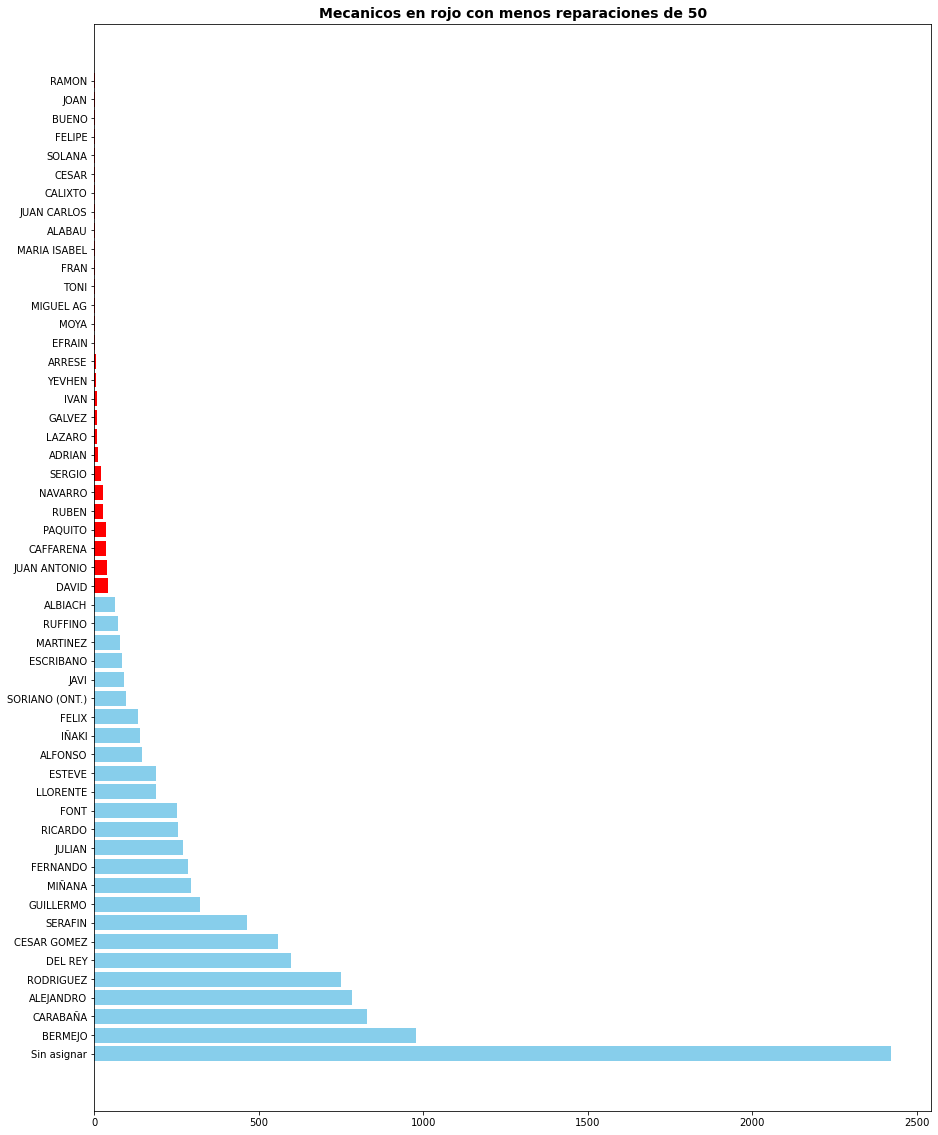

In [38]:
plt.figure(figsize=(15,20))
limite=50

x=df['aliasemp'].value_counts().index
y=df['aliasemp'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)
#alias.plot(kind='barh',color=my_color)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\aliasemp.png')

In [39]:
df.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant',
       'ndias_ant_subarea', 'tiempos'],
      dtype='object')

In [40]:
df.dtypes

v_codigbus            object
v_edad                 int64
aliasemp              object
aliasemp_ant          object
dispositivo           object
capacidad              int64
marca                 object
modelo                object
longitud             float64
tara                 float64
cilindrada           float64
potencia               int64
tipo                  object
subtipo               object
subarea               object
subarea_ant           object
dias_ant               int64
ndias_ant_subarea      int64
tiempos               object
dtype: object

# Generamos el Dataset  que solo contiene las averias de motor

In [41]:
target='Motor'
df['target'] = np.where((df['subarea'].str.contains(target)),1,0)


In [42]:
df_motor=df[df['target']==1]


In [43]:
df_motor.reset_index(drop = True, inplace = True)

In [44]:
df_motor.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant',
       'ndias_ant_subarea', 'tiempos', 'target'],
      dtype='object')

# CODIFICACION Y ESTANDARIZACIÓN
## Codificación de las variables categoricas

In [45]:
import category_encoders as ce
df_cat=df_motor.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['v_codigbus','dispositivo','aliasemp','aliasemp_ant', 'subarea','subarea_ant', 'marca','modelo','tipo','subtipo','tiempos'])
df_enc = encoder.fit_transform(df_cat)
df_enc

,v_codigbus,aliasemp,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea,subarea_ant,tiempos
0,1,1,1,1,1,1,1,1,1,1,1
1,1,2,2,1,1,1,1,1,1,2,2
2,2,3,3,1,2,2,1,2,1,1,1
3,2,4,4,1,2,2,1,2,1,3,3
4,3,4,2,1,3,3,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1290,147,12,4,2,6,21,1,2,1,6,2
1291,147,10,13,2,6,21,1,2,1,5,3
1292,147,10,10,2,6,21,1,2,1,5,3
1293,147,12,13,2,6,21,1,2,1,27,3


In [46]:
df_motor.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant',
       'ndias_ant_subarea', 'tiempos', 'target'],
      dtype='object')

## estadarización de las variables nuemricas

In [47]:
df_num=df_motor.select_dtypes(include=np.number)
cols_num=df_num.drop(columns=['dias_ant','ndias_ant_subarea','target']).columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num.drop(columns=['dias_ant','ndias_ant_subarea','target']))
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)
scaled_df[['dias_ant','ndias_ant_subarea','target']]=df_num[['dias_ant','ndias_ant_subarea','target']]

In [48]:
df_num

,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant,ndias_ant_subarea,target
0,15,55,12.00,12972.0,10640.0,280,27,577,1
1,15,55,12.00,12972.0,10640.0,280,42,116,1
2,13,35,8.39,8340.0,6871.0,176,108,581,1
3,13,35,8.39,8340.0,6871.0,176,35,35,1
4,16,53,12.80,13421.0,12130.0,309,51,232,1
...,...,...,...,...,...,...,...,...,...
1290,5,39,9.90,11470.0,6700.0,226,23,79,1
1291,5,39,9.90,11470.0,6700.0,226,39,39,1
1292,5,39,9.90,11470.0,6700.0,226,39,39,1
1293,5,39,9.90,11470.0,6700.0,226,4,46,1


In [49]:
scaled_df

,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant,ndias_ant_subarea,target
0,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27,577,1
1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42,116,1
2,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108,581,1
3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35,35,1
4,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51,232,1
...,...,...,...,...,...,...,...,...,...
1290,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,23,79,1
1291,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1292,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1293,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,4,46,1


Creamos el Dataset , al cual le podemos aplicar los  modelos

In [50]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

(1295, 20)

In [51]:
df_norm

,v_codigbus,aliasemp,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea,subarea_ant,tiempos,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant,ndias_ant_subarea,target
0,1,1,1,1,1,1,1,1,1,1,1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27,577,1
1,1,2,2,1,1,1,1,1,1,2,2,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42,116,1
2,2,3,3,1,2,2,1,2,1,1,1,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108,581,1
3,2,4,4,1,2,2,1,2,1,3,3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35,35,1
4,3,4,2,1,3,3,1,1,1,2,1,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51,232,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,147,12,4,2,6,21,1,2,1,6,2,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,23,79,1
1291,147,10,13,2,6,21,1,2,1,5,3,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1292,147,10,10,2,6,21,1,2,1,5,3,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39,39,1
1293,147,12,13,2,6,21,1,2,1,27,3,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,4,46,1


comprobamos si hay outlayers que podamos eliminar, en principio no podemso eliminanr ninguno porque aportan información consistente

(array([0]), [Text(0, 0, '0')])

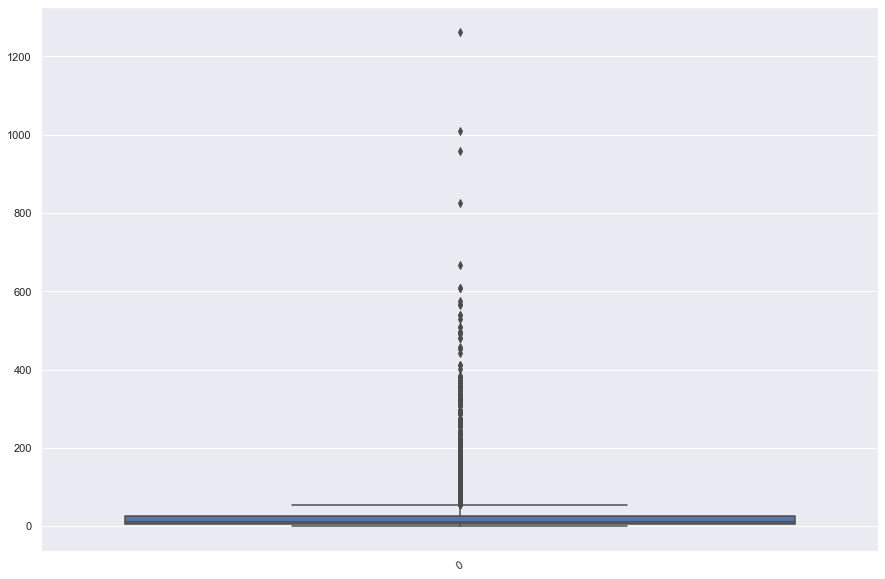

In [52]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df['dias_ant'])
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'v_codigbus'),
  Text(1, 0, 'aliasemp'),
  Text(2, 0, 'aliasemp_ant'),
  Text(3, 0, 'dispositivo'),
  Text(4, 0, 'marca'),
  Text(5, 0, 'modelo'),
  Text(6, 0, 'tipo'),
  Text(7, 0, 'subtipo'),
  Text(8, 0, 'subarea'),
  Text(9, 0, 'subarea_ant'),
  Text(10, 0, 'tiempos')])

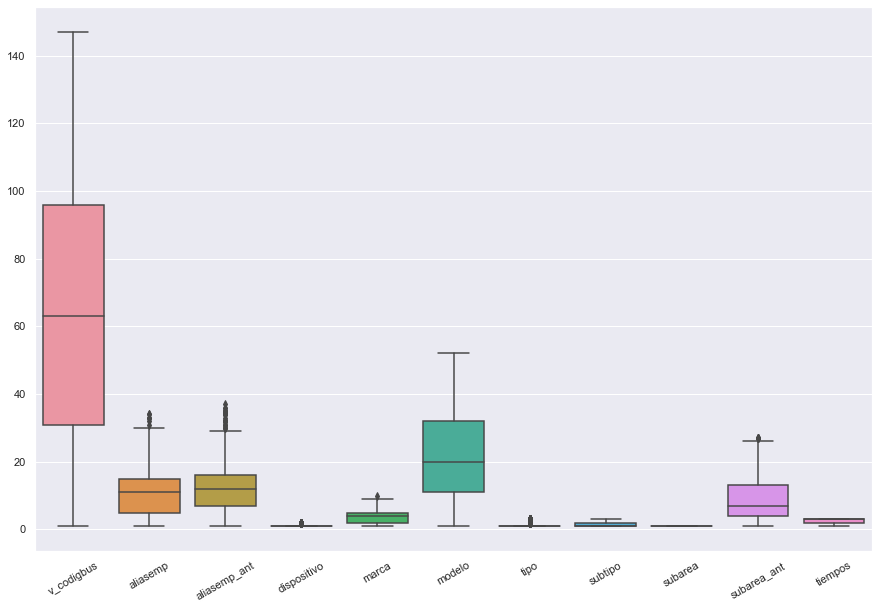

In [53]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df_enc)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'v_edad'),
  Text(1, 0, 'capacidad'),
  Text(2, 0, 'longitud'),
  Text(3, 0, 'tara'),
  Text(4, 0, 'cilindrada'),
  Text(5, 0, 'potencia')])

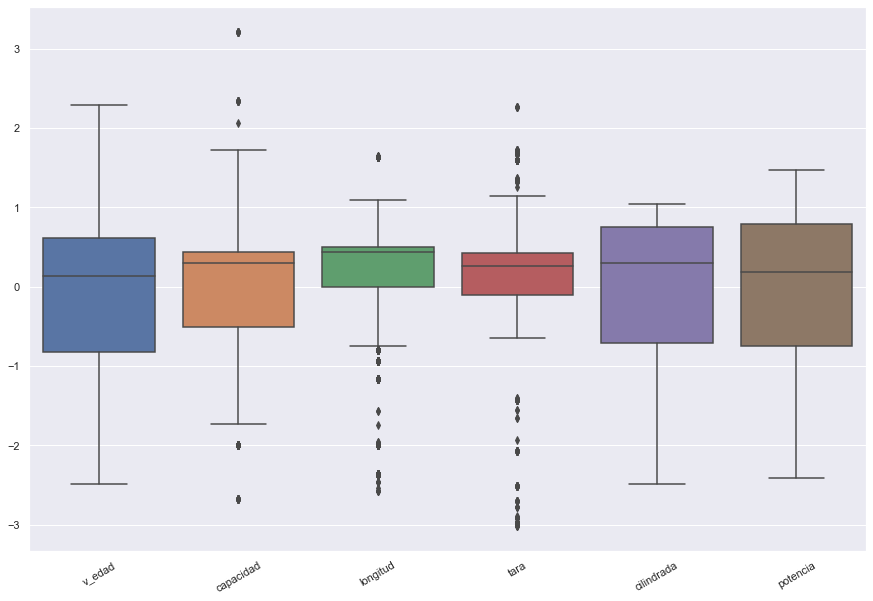

In [54]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=scaled_df.drop(columns=['dias_ant','ndias_ant_subarea','target']))
plt.xticks(rotation=30)

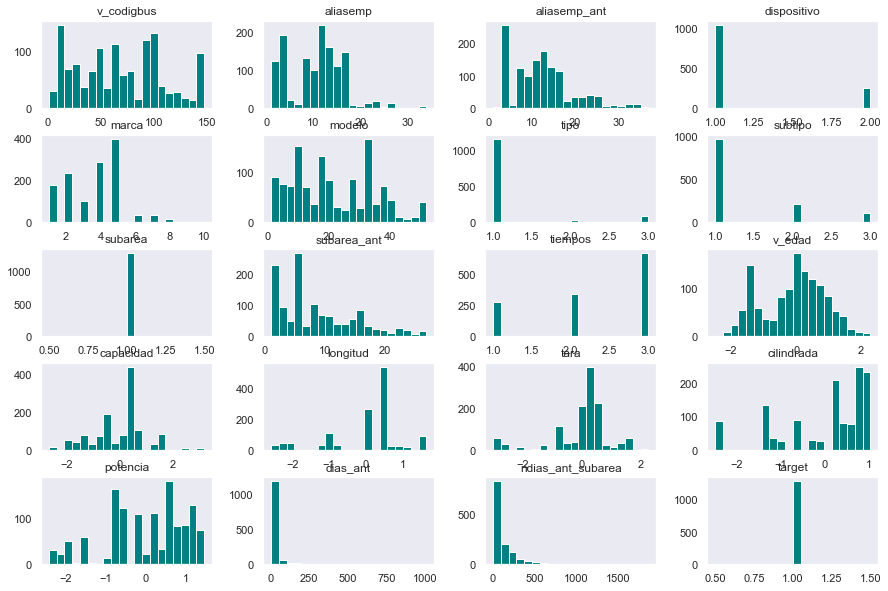

In [55]:
hist_mean= df_norm.hist(bins=20,figsize=(15,10),grid=False, color='teal')

# Creamos tablas para mantener la interpretabilidad

In [56]:
df_tiempos = pd.DataFrame({'tiempos':pd.unique(df_motor.tiempos), 'codigo':pd.unique(df_norm.tiempos)})

df_tiempos

,tiempos,codigo
0,mas de 6 mese,1
1,de 2 a 6 meses,2
2,de 0 a 2 meses,3


In [57]:
df_subarea_ant = pd.DataFrame({'subarea_ant':pd.unique(df_motor.subarea_ant), 'codigo':pd.unique(df_norm.subarea_ant)})

df_subarea_ant

,subarea_ant,codigo
0,Fuga de aire,1
1,Climatización,2
2,Puertas,3
3,Luces,4
4,Motor,5
5,Sistema de dirección,6
6,Sistema de transmisión,7
7,Sistema de refrigeración,8
8,Gasoil,9
9,Ruedas,10


In [58]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df_motor.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

,v_codigbus,codigo
0,61HC,1
1,73HC,2
2,77HC,3
3,ACV0204,4
4,ACV0271,5
...,...,...
142,X114,143
143,X115,144
144,X116,145
145,X117,146


In [59]:

df_aliasemp = pd.DataFrame({'aliasemp':pd.unique(df_motor.aliasemp), 'codigo':pd.unique(df_norm.aliasemp)})
df_aliasemp

,aliasemp,codigo
0,ALEJANDRO,1
1,TONI,2
2,Sin asignar,3
3,YEVHEN,4
4,FELIX,5
5,CAFFARENA,6
6,ALFONSO,7
7,RODRIGUEZ,8
8,ESTEVE,9
9,RICARDO,10


In [60]:
df_marca = pd.DataFrame({'Marca':pd.unique(df_motor.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

,Marca,codigo
0,SCANIA,1
1,MERCEDES BENZ,2
2,VOLVO,3
3,IVECO,4
4,MAN,5
5,CUMMINS,6
6,DAF,7
7,IVECO/FIAT,8
8,RENAULT,9
9,FIAT,10


In [61]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df_motor.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

,modelo,codigo
0,CENTURY,1
1,OPALIN,2
2,DIVO,3
3,SIDERAL,4
4,TOURING III,5
5,DIVO II,6
6,AURA,7
7,TOURING,8
8,TOURING INTERCITY,9
9,Pb,10


In [62]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df_motor.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

,tipo,codigo
0,Discrecional,1
1,Interurbano,2
2,Urbano,3


In [63]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df_motor.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

,subtipo,codigo
0,Normal,1
1,Midibus,2
2,Microbus,3


In [64]:
df_motor['subtipo'].value_counts()

Normal      970
Midibus     215
Microbus    110
Name: subtipo, dtype: int64

Comprobamos la cantidad de observaciones que existen por subtipo

<BarContainer object of 3 artists>

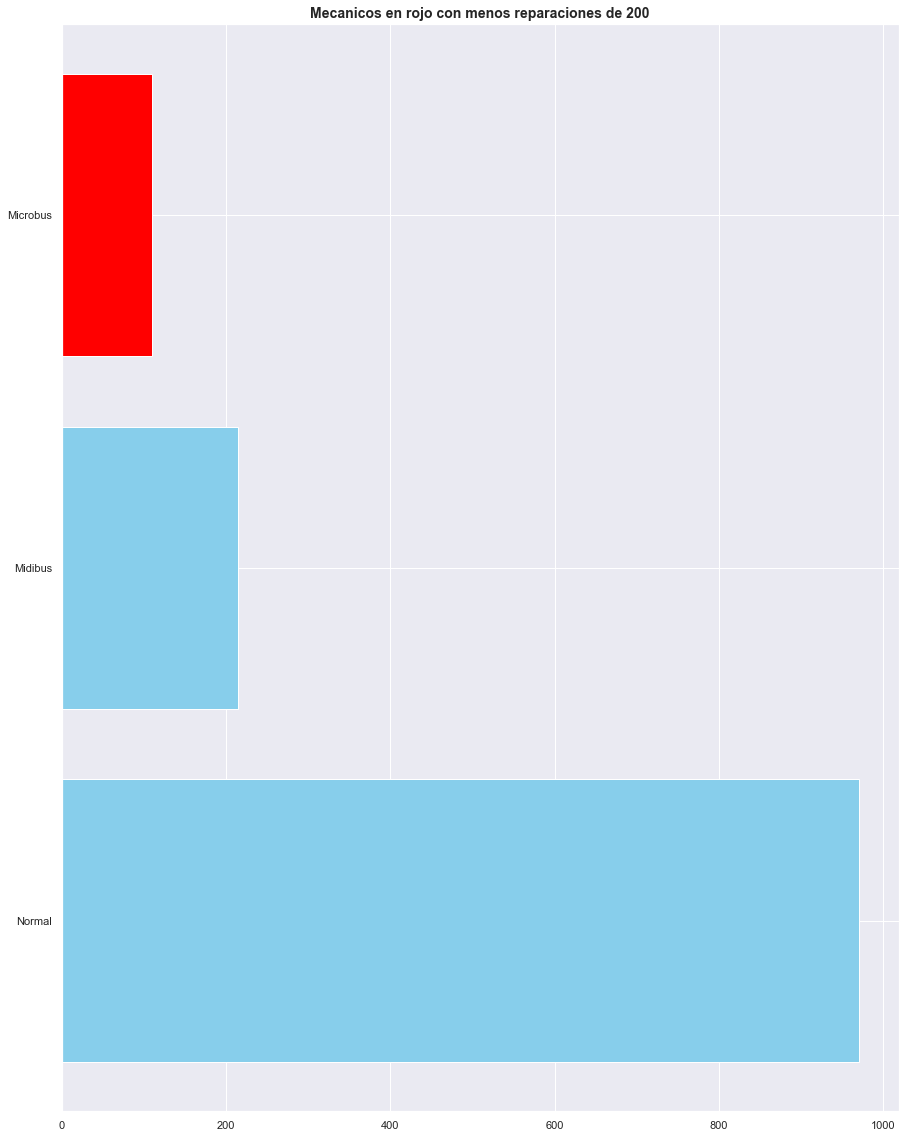

In [65]:
plt.figure(figsize=(15,20))
limite=200

x=df_motor['subtipo'].value_counts().index
y=df_motor['subtipo'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

comprobamso la cantidad de observaciones por cada uno d elos valores de la variable objetivo,
vemso que está desvalanceado

<BarContainer object of 3 artists>

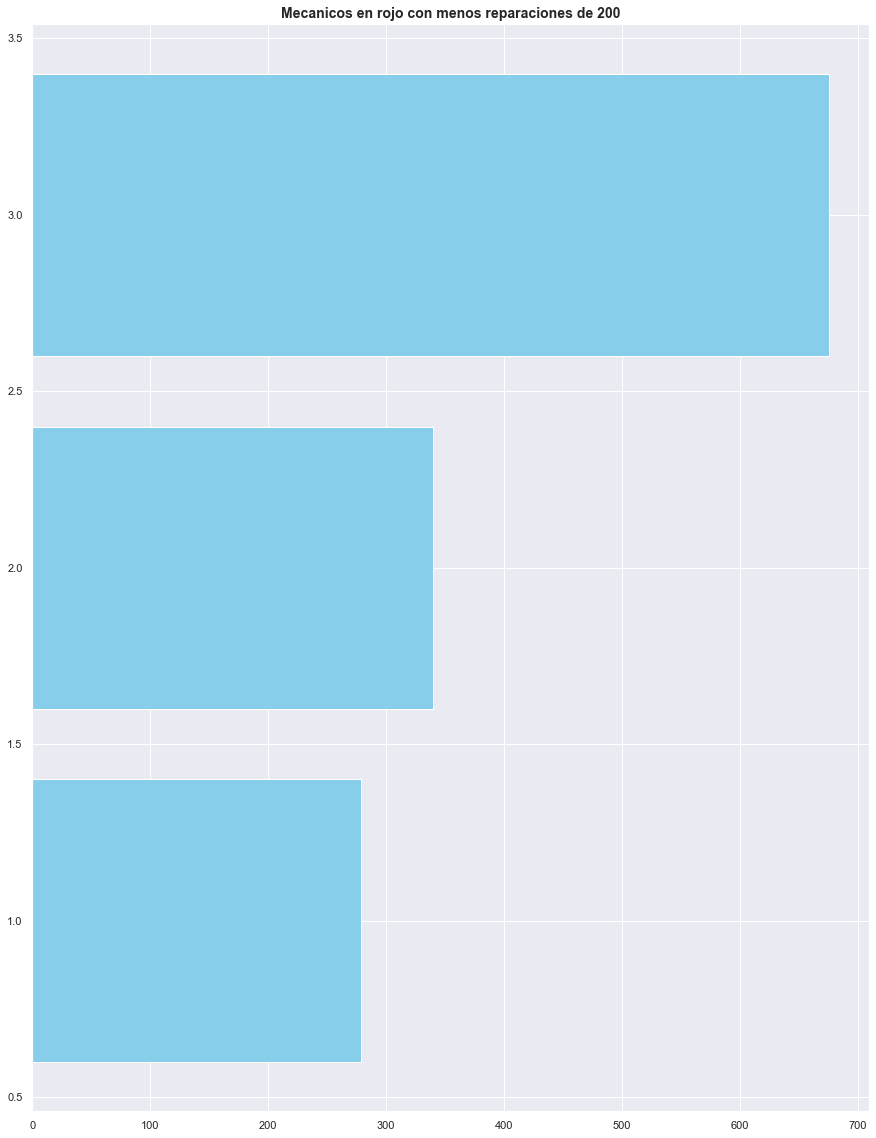

In [66]:
plt.figure(figsize=(15,20))
limite=200

x=df_norm['tiempos'].value_counts().index
y=df_norm['tiempos'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

In [67]:
df_norm=df_norm.drop(['subarea','aliasemp','target','ndias_ant_subarea'],axis=1)

comprobamos las correlaciones, y se observan que hay variable sfuertemente correlacionadas, por encima de 80%

<AxesSubplot:>

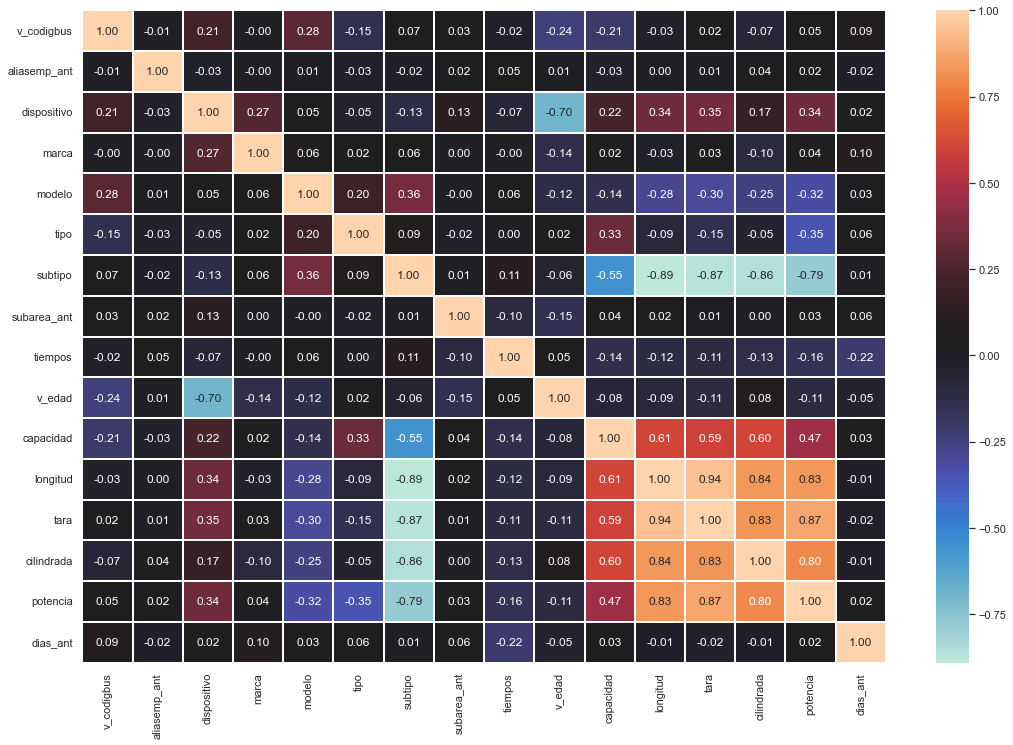

In [68]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

Utilizando la Librería de Feature selector, se pretende elegir las variables que aportes mas información y eliminar las que menos informacion aporten

Fuente: https://github.com/WillKoehrsen/feature-selector


# Feature selector

In [69]:
df_norm

,v_codigbus,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,tiempos,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant
0,1,1,1,1,1,1,1,1,1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27
1,1,2,1,1,1,1,1,2,2,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42
2,2,3,1,2,2,1,2,1,1,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108
3,2,4,1,2,2,1,2,3,3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35
4,3,2,1,3,3,1,1,2,1,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,147,4,2,6,21,1,2,6,2,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,23
1291,147,13,2,6,21,1,2,5,3,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39
1292,147,10,2,6,21,1,2,5,3,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,39
1293,147,13,2,6,21,1,2,27,3,-1.296209,-0.646476,-1.167999,-0.332174,-1.090958,-0.650376,4


In [70]:
train_labels=df_norm['tiempos']
train=df_norm.drop(columns = 'tiempos')

In [71]:
fs = FeatureSelector(data = train, labels = train_labels)


In [72]:
train_labels

0       1
1       2
2       1
3       3
4       1
       ..
1290    2
1291    3
1292    3
1293    3
1294    3
Name: tiempos, Length: 1295, dtype: int32

## Missing Values

*El primer método de selección de características es sencillo: encuentre cualquier columna con una fracción faltante mayor que un umbral especificado*

In [73]:

fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



In [74]:
missing_features = fs.ops['missing']
missing_features[:10]


[]

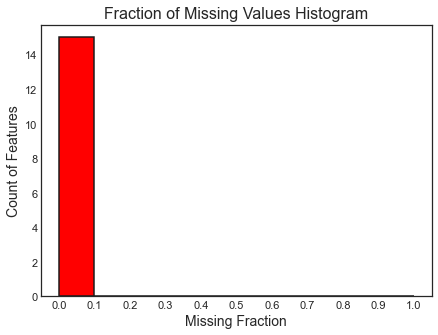

In [75]:
fs.plot_missing()

## Single Unique Value
*El siguiente método es sencillo: encuentre cualquier característica que tenga un solo valor único*

In [76]:
fs.identify_single_unique()

0 features with a single unique value.



In [77]:
single_unique = fs.ops['single_unique']
single_unique

[]

*Podemos hacer un histograma del número de valores únicos en cada característica del conjunto de datos*

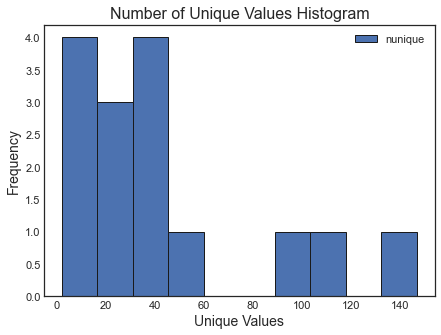

In [78]:
fs.plot_unique()

*Finalmente, podemos acceder a un dataframe con la cantidad de valores únicos por función.*

In [79]:
fs.unique_stats.sample(5)


,nunique
tipo,3
cilindrada,28
longitud,36
aliasemp_ant,37
v_codigbus,147


## Collinear (highly correlated) Features
*Este método encuentra pares de características colineales basadas en el coeficiente de correlación de Pearson. Para cada par por encima del umbral especificado (en términos de valor absoluto), identifica una de las variables a eliminar. Necesitamos pasar un umbral de correlación*

In [80]:
fs.identify_collinear(correlation_threshold=0.80)

4 features with a correlation magnitude greater than 0.80.



In [81]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['longitud', 'tara', 'cilindrada', 'potencia']

*Podemos ver un mapa de calor de las correlaciones por encima del umbral. Las características que se eliminarán están en el eje x.*

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'tara'), Text(0, 1.5, 'subtipo'), Text(0, 2.5, 'longitud')])

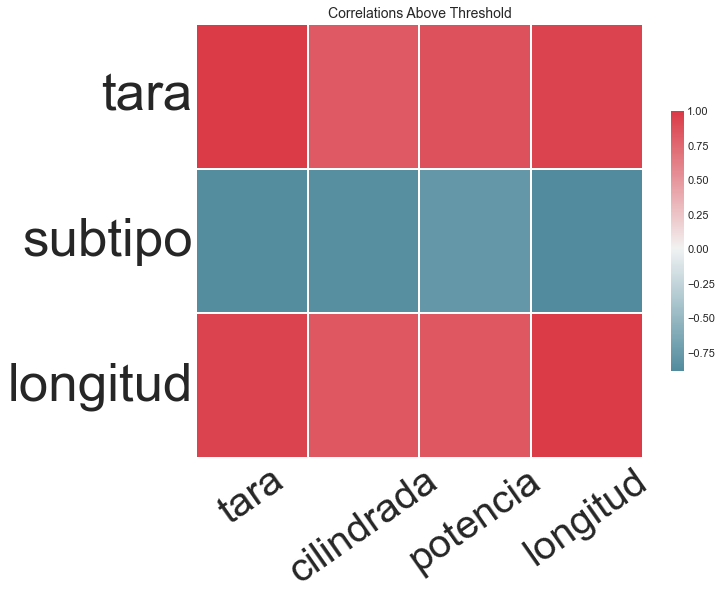

In [82]:
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)



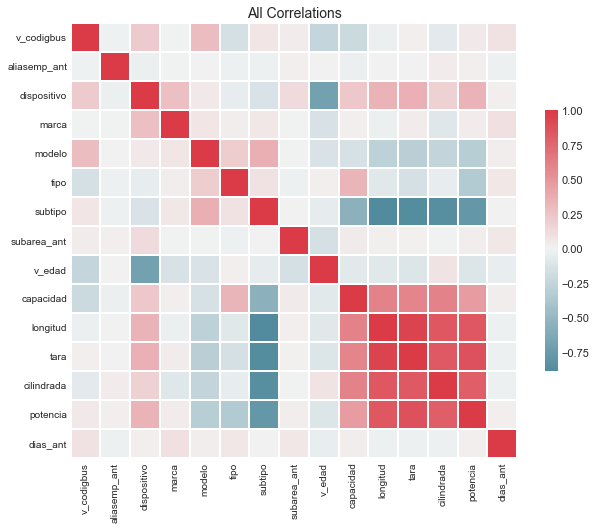

In [83]:
fs.plot_collinear(plot_all=True)

4 features with a correlation magnitude greater than 0.80.



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'tara'), Text(0, 1.5, 'subtipo'), Text(0, 2.5, 'longitud')])

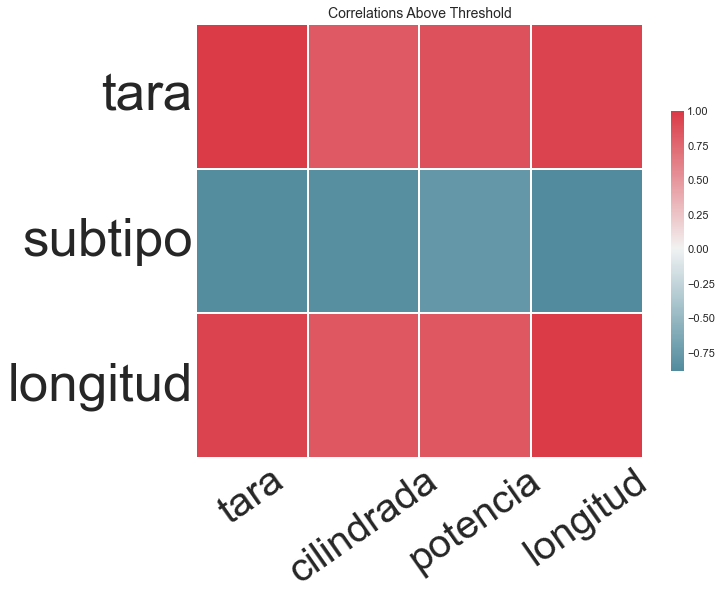

In [84]:
fs.identify_collinear(correlation_threshold=0.80)
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)

*Para ver los detalles de las correlaciones por encima del umbral, accedemos al atributo record_collinear que es un marco de datos. Se eliminará drop_feature y, para cada función que se elimine, puede haber varias correlaciones que tenga con corr_feature que estén por encima del umbral de correlación.*

In [85]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,longitud,subtipo,-0.891075
1,tara,subtipo,-0.871875
2,tara,longitud,0.942037
3,cilindrada,subtipo,-0.860073
4,cilindrada,longitud,0.835853


## Zero Importance Features

*Este método se basa en un modelo de aprendizaje automático para identificar las funciones que se van a eliminar. Por lo tanto, requiere un problema de aprendizaje supervisado con etiquetas. El método funciona al encontrar la importancia de las características utilizando un Gradientboosting implementado en la biblioteca LightGBM*

In [86]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = False)

#fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
#                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



*Ejecutar el modelo de GradientBosting, requiere una codificación one hot de las características. Estas funciones se guardan en el atributo one_hot_features del FeatureSelector. Las características originales se guardan en base_features*

In [87]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))


There are 15 original features
There are 0 one-hot features


*El atributo de data del FeatureSelector contiene el dataframe original. Después de la codificación one-hot, el atributo data_all contiene los datos originales más las características codificadas one-hot.*

In [88]:
fs.data_all.head(10)

,v_codigbus,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant
0,1,1,1,1,1,1,1,1,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,27
1,1,2,1,1,1,1,1,2,1.090187,0.436910,-0.008210,0.180959,0.284054,0.204639,42
2,2,3,1,2,2,1,2,1,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,108
3,2,4,1,2,2,1,2,3,0.612908,-0.917323,-2.001942,-1.401484,-1.031281,-1.442056,35
4,3,2,1,3,3,1,1,2,1.328826,0.301487,0.433615,0.334352,0.804045,0.663813,51
5,4,5,1,4,4,1,1,4,1.090187,0.436910,0.533025,0.245527,0.168190,0.774649,265
6,5,4,1,5,5,1,1,2,-1.296209,1.520297,1.648632,1.323037,0.903855,1.360492,20
7,5,6,1,5,5,1,1,2,-1.296209,1.520297,1.648632,1.323037,0.903855,1.360492,3
8,5,4,1,5,5,1,1,2,-1.296209,1.520297,1.648632,1.323037,0.903855,1.360492,16
9,6,6,1,3,6,1,1,2,0.851547,0.436910,0.433615,0.465539,0.804045,0.663813,75


*Hay una serie de métodos que podemos usar para inspeccionar los resultados de la importancia de las características. Primero podemos acceder a la lista de características con importancia cero*

In [89]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

*La gráfica de importancia de las características usando plot_feature_importances nos mostrará las características más importantes de plot_n (en una escala normalizada donde las características suman 1). También nos muestra la importancia acumulada de las funciones frente al número de funciones*

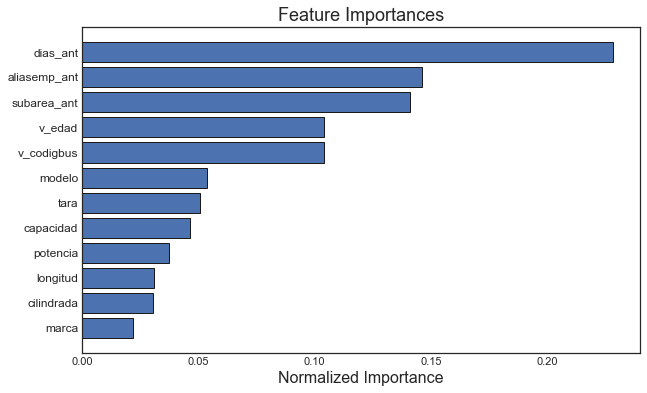

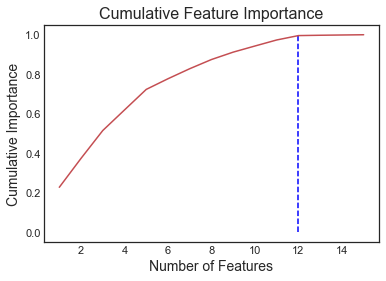

12 features required for 0.99 of cumulative importance


In [90]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

*Se puede acceder a todas las caracteristicas importantes en el atributo feature_importances del FeatureSelector*

In [91]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,dias_ant,20550.0,0.228333,0.228333
1,aliasemp_ant,13165.0,0.146278,0.374611
2,subarea_ant,12675.0,0.140833,0.515444
3,v_edad,9378.0,0.104200,0.619644
4,v_codigbus,9350.0,0.103889,0.723533
5,modelo,4852.0,0.053911,0.777444
6,tara,4565.0,0.050722,0.828167
7,capacidad,4184.0,0.046489,0.874656
8,potencia,3366.0,0.037400,0.912056
9,longitud,2789.0,0.030989,0.943044


In [92]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)


15

## Low Importance Features
*Este método se basa en las importancias de las características del Gradientbossting (primero se debe ejecutar identify_zero_importance) al encontrar las características de menor importancia que no se necesitan para alcanzar una importancia de característica total acumulada específica*

In [93]:
fs.identify_low_importance(cumulative_importance = 0.99)

11 features required for cumulative importance of 0.99 after one hot encoding.
4 features do not contribute to cumulative importance of 0.99.



*Las características de baja importancia para eliminar son aquellas que no contribuyen a la importancia acumulada especificada. Estos también están disponibles en el diccionario de operaciones.*

In [94]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['marca', 'tipo', 'subtipo', 'dispositivo']

## Removing Features
*Una vez que hayamos identificado las funciones que se eliminarán, tenemos varias formas de descartarlas.
hay que inspeccionar las caracteristicass que se eliminarán antes de usar la función de eliminación.*

In [95]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [96]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 0 features.


In [97]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 8 features identified for removal


[]

In [98]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 8 features.


## Handling One-Hot Features

Eliminar todas las caracteristas one-hot.

In [99]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)


['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 8 features including one-hot features.


In [100]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 15
Final Number of Features:  7


In [101]:
train_removed_all

,v_codigbus,aliasemp_ant,modelo,subarea_ant,v_edad,capacidad,dias_ant
0,1,1,1,1,1.090187,0.436910,27
1,1,2,1,2,1.090187,0.436910,42
2,2,3,2,1,0.612908,-0.917323,108
3,2,4,2,3,0.612908,-0.917323,35
4,3,2,3,2,1.328826,0.301487,51
...,...,...,...,...,...,...,...
1290,147,4,21,6,-1.296209,-0.646476,23
1291,147,13,21,5,-1.296209,-0.646476,39
1292,147,10,21,5,-1.296209,-0.646476,39
1293,147,13,21,27,-1.296209,-0.646476,4


volvemos a añadir subtipo por que se considera que es importante, por como se distrubuyen los datos

In [102]:
train_removed_all['subtipo']=df_norm['subtipo']

### Analisis de componentes principales

In [103]:
df_feat = np.transpose(train_removed_all)
#df_feat=df_feat.drop('target', 0)
names =  df_feat.index
names

Index(['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant', 'subtipo'],
      dtype='object')

In [104]:
len(names)

8

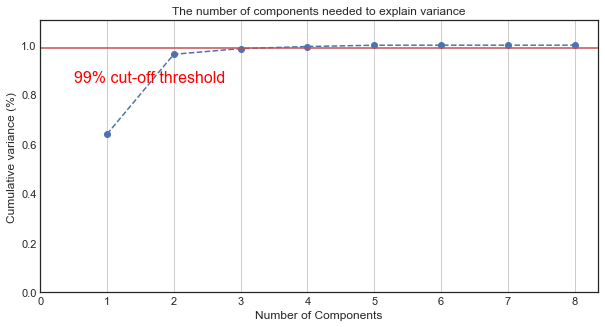

In [105]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

El primer paso del análisis es comprobar como se distribuyen las variables utilizando el PCA
Vemos que con 3 variables podemos representar el 99% de la distribución en varianza de todas las componentes.    
Y que las variables subtipo, v_edad y capacidad están muy próximas entre sí.Por lo que aportarán información similar.

Variance Ratio:  [0.74216193 0.12000071 0.07364817]


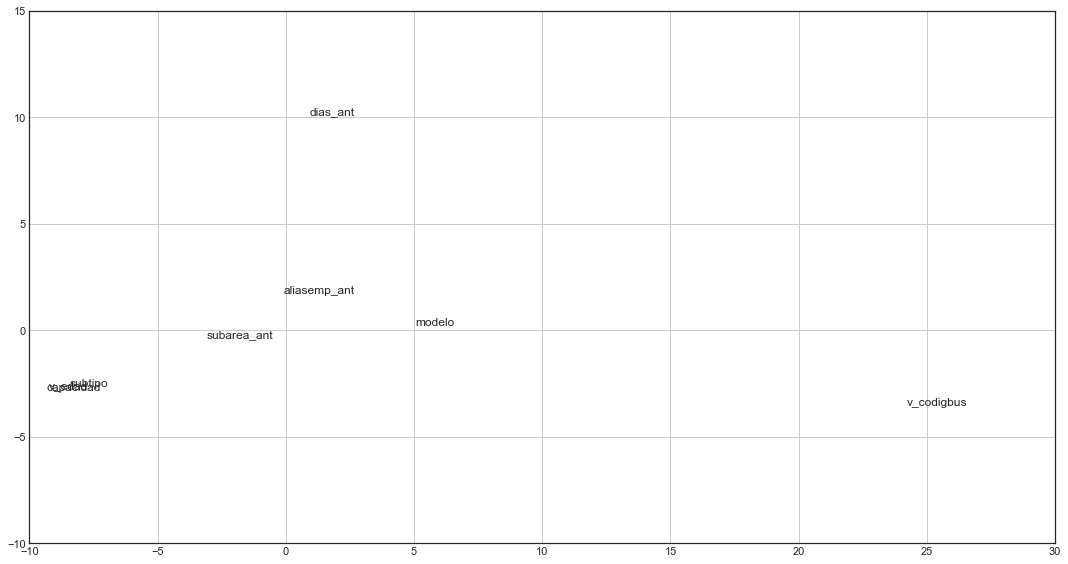

In [106]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components =3)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-10, 30)
plt.ylim(-10, 15)
ax.grid(True)
fig.tight_layout()
plt.show()

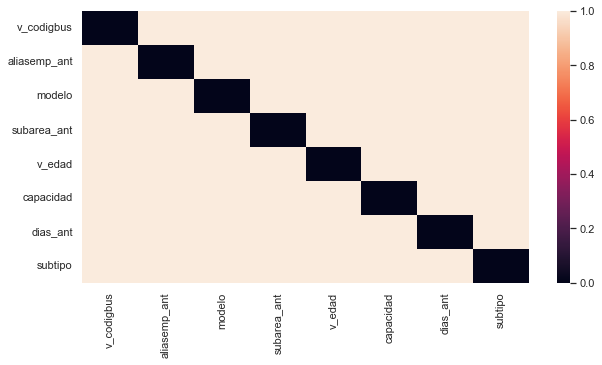

In [107]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

Obtenemos la distancia entre variables en función de su varianza  no vemos una proximidad tan alta entre capacidad y v_edad

C:\Users\Dani\AppData\Local\Temp/ipykernel_1132/3741172497.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


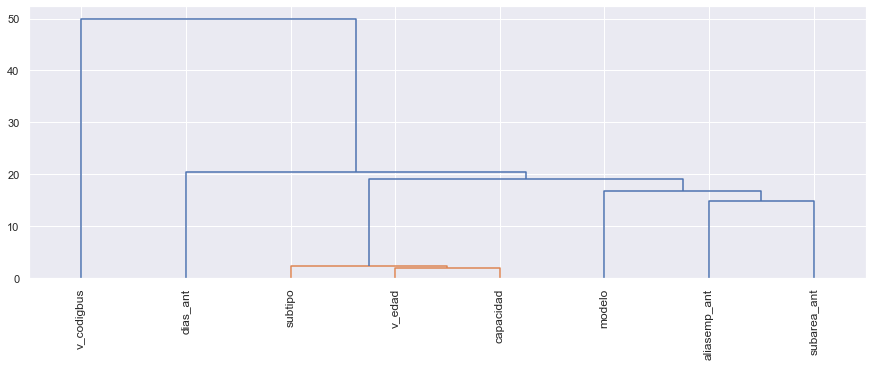

In [108]:


clusters = cluster.hierarchy.linkage(matdist, method = 'single')

plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

Podemos ver gráficamente que ciertamente las variables que hemos visto con PCA son las que mas próximas están entre sí, por lo que explican la varianza de forma similar.

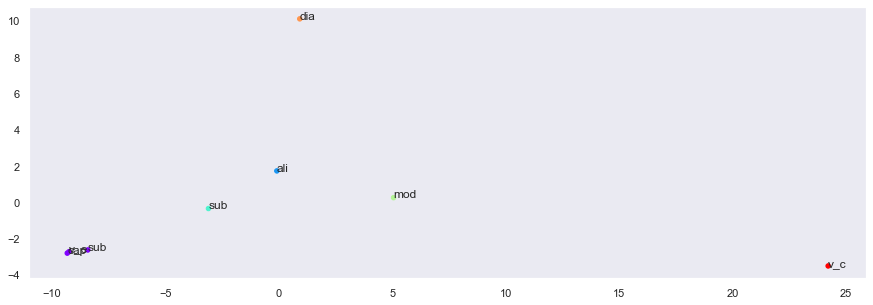

In [109]:
cut = 3 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 


plt.grid()
plt.show()

In [110]:
df_norm.columns

Index(['v_codigbus', 'aliasemp_ant', 'dispositivo', 'marca', 'modelo', 'tipo',
       'subtipo', 'subarea_ant', 'tiempos', 'v_edad', 'capacidad', 'longitud',
       'tara', 'cilindrada', 'potencia', 'dias_ant'],
      dtype='object')

# Reduccion de variables PCA

In [111]:
names = train_removed_all.columns
len(names)

8

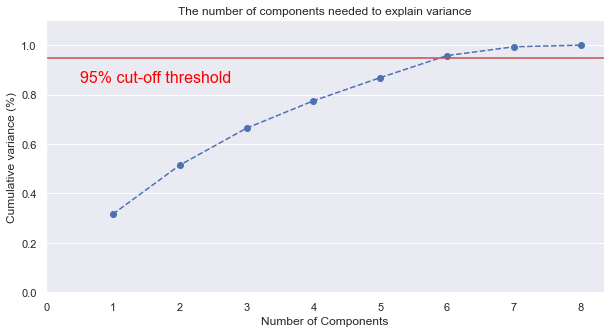

In [112]:
#names=df_norm['target']
#names2=df_norm['subtipo']

from sklearn.decomposition import PCA
min_max_scaler = preprocessing.MinMaxScaler()
#features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))
features_norm = min_max_scaler.fit_transform(train_removed_all)
pca = PCA().fit(features_norm)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Vemos que para explicar el 95% de la varianza necesitamos 6 variables por lo que no compensa perder la interpretabilidad de las variables para ahorrarnos una variable.

In [113]:
#names=df_norm['target']
names2=df_norm['subtipo']

C:\Users\Dani\AppData\Local\Temp/ipykernel_1132/2612094447.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_norm = min_max_scaler.fit_transform(df_norm.drop('tiempos', 1))


Variance Ratio:  [0.3663549  0.20094205 0.09754883 0.08271516 0.0648074  0.04441806]


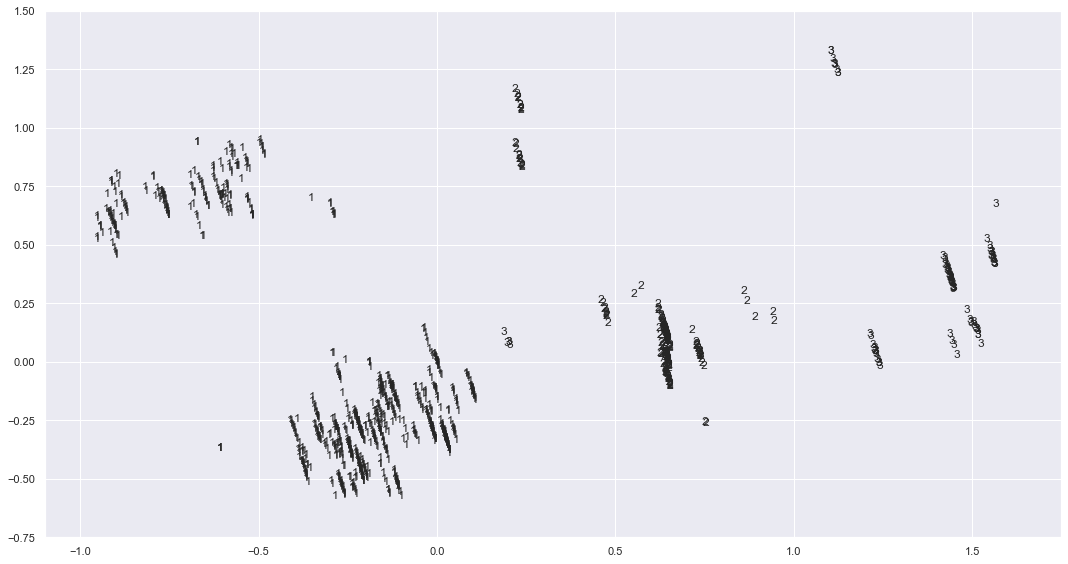

In [114]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('tiempos', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 6)
X_pca = estimator.fit_transform(features_norm)
print(("Variance Ratio: "), estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names2[i]) 


plt.xlim(-1.1, 1.75)
plt.ylim(-0.75, 1.5)
ax.grid(True)
fig.tight_layout()
plt.show()

Para añadir valor a la distribución se a probado a nombrar cada punto con distintas columnas de características, podemos ver que el subtipo nos aporta información importante ya que los autobuses del subtipo 1 'Normal' forman un cluster y el resto otro.
También podemos ver que no vale la pena reducir la dimensionalidad ya que perdemos la interoperabilidad y la varianza explicada de las primeras variables sintéticas no supera el 60%

For n_clusters = 2 The average silhouette_score is : 0.3207106280967586
For n_clusters = 3 The average silhouette_score is : 0.3581280015694073
For n_clusters = 4 The average silhouette_score is : 0.35928182852922297
For n_clusters = 5 The average silhouette_score is : 0.3416768295545521
For n_clusters = 6 The average silhouette_score is : 0.26365524132571494


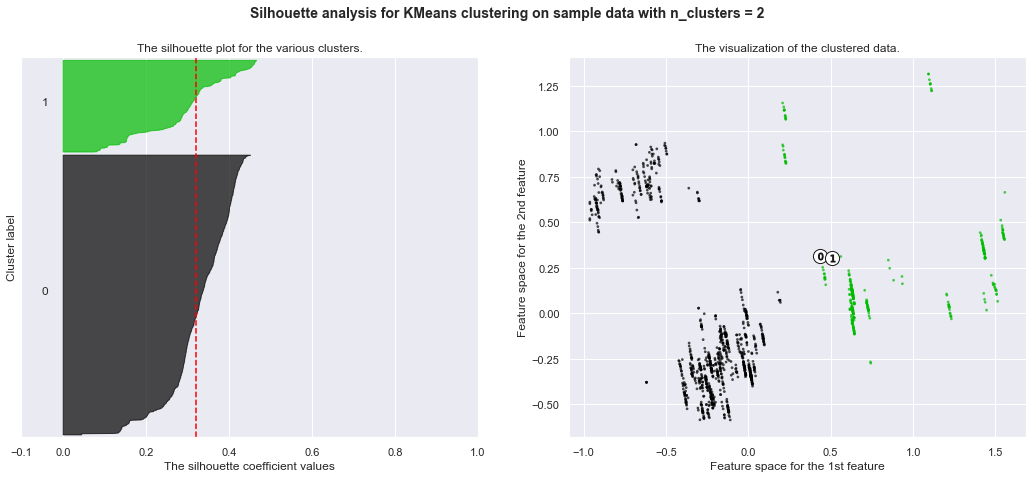

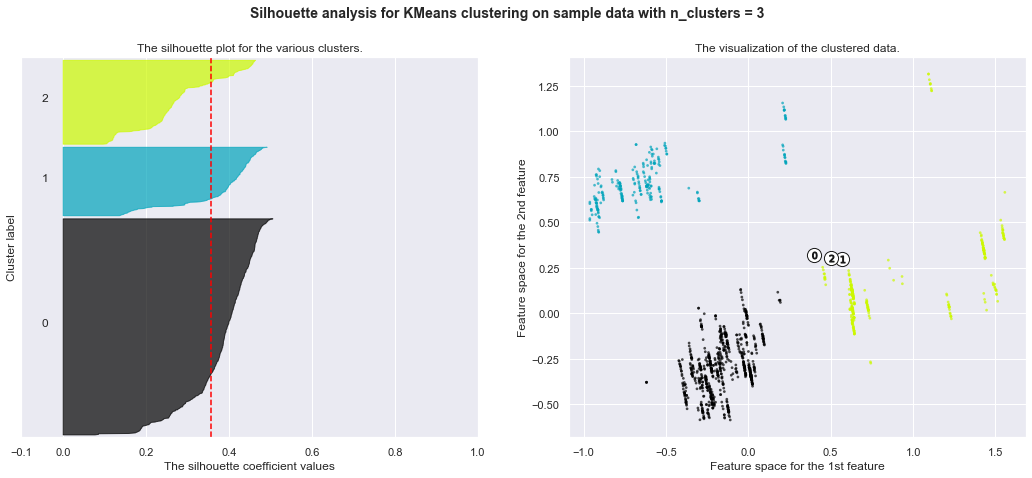

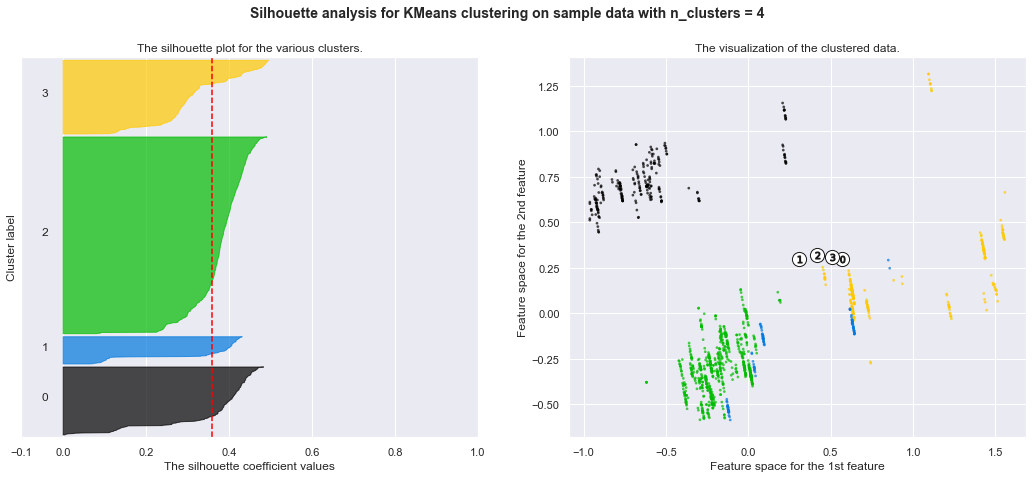

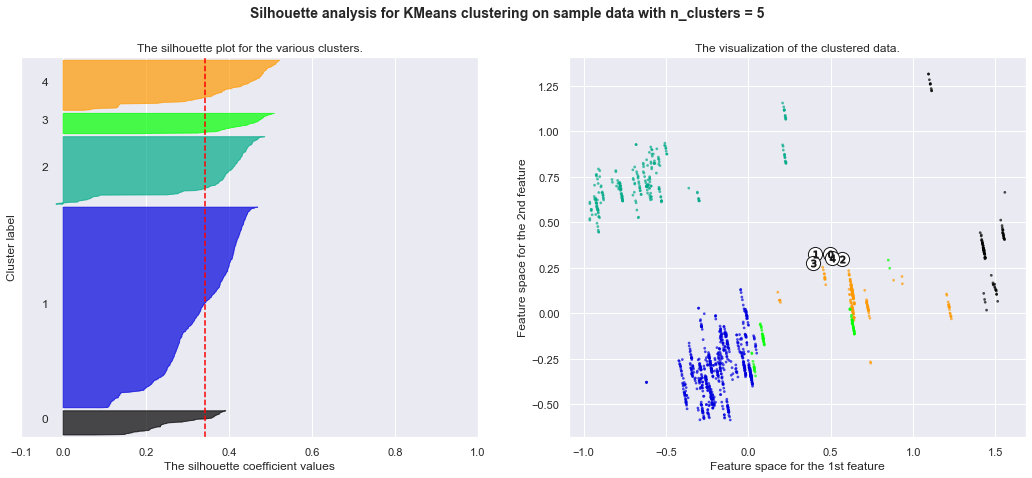

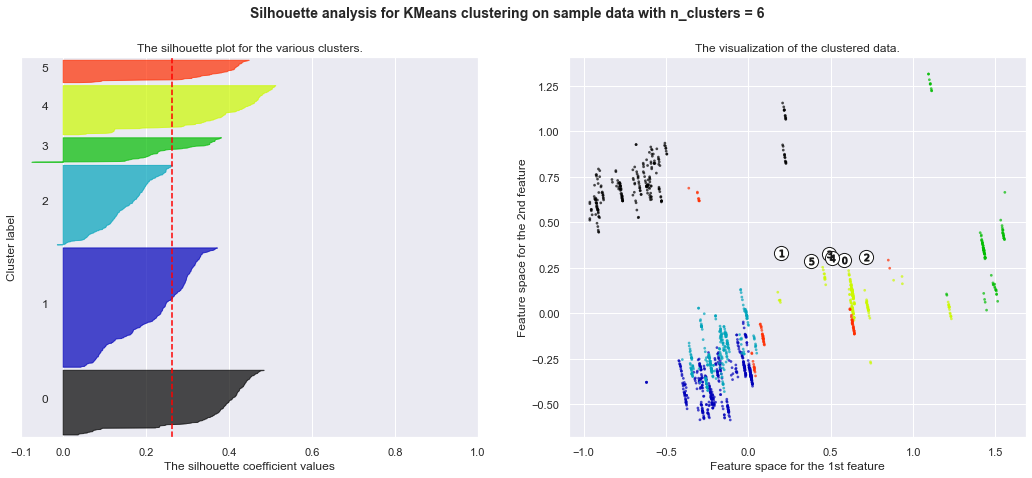

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

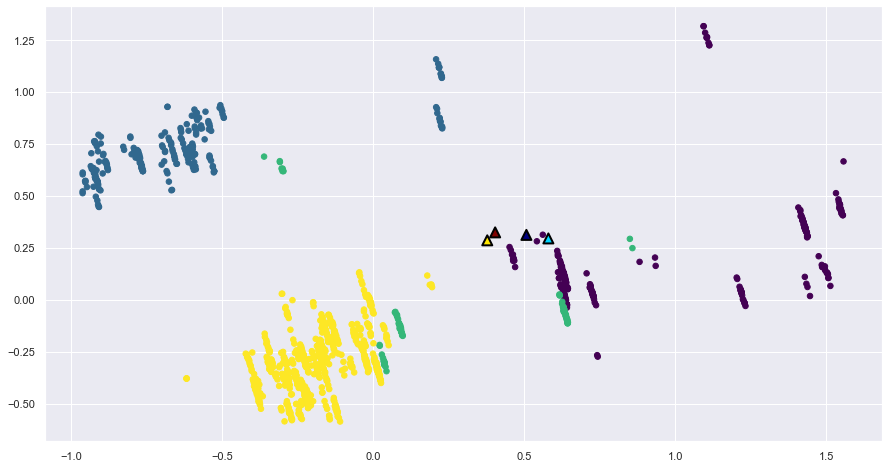

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1,2,3],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")

In [117]:
train_removed_all['Kmeans_cluster']= labels
train_removed_all['tiempos']= train_labels

Creamos una variable sintentica con los claster obtenidos del Kmeans que no usaremos para separa el dataset ya que quedarian muy pocas observaciones por cluster

<AxesSubplot:>

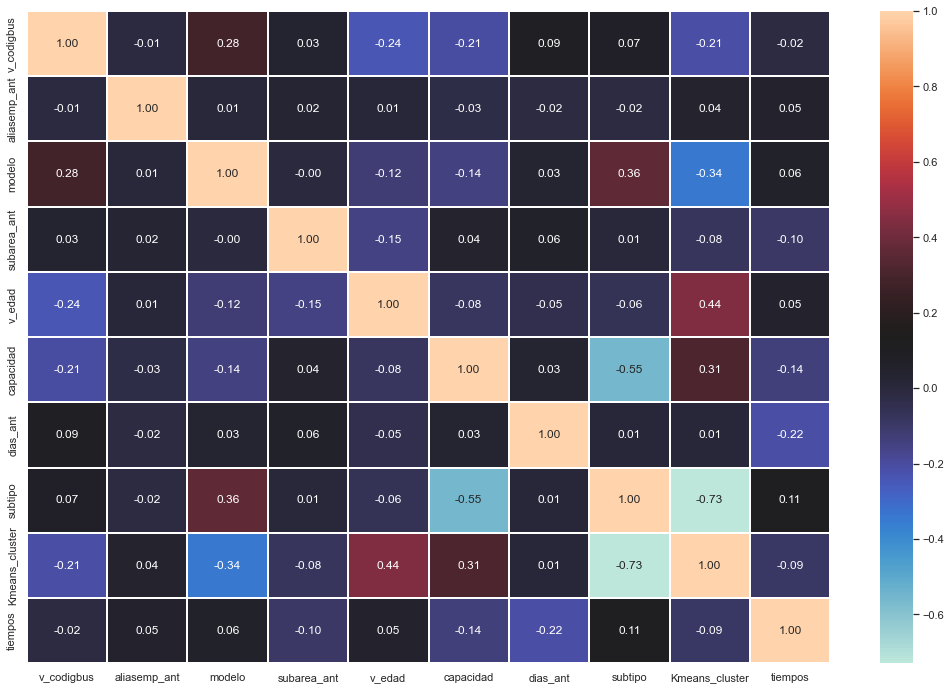

In [118]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(train_removed_all.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones.png')

In [171]:
train_removed_all.columns

Index(['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant', 'subtipo', 'Kmeans_cluster', 'tiempos'],
      dtype='object')

In [172]:

features=['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant','subtipo','Kmeans_cluster','tiempos']
            
new_df=train_removed_all[features]


No se aplican transformaciones ya que despues de varias pruebas no se consigue ningun incremento de la correlacion entre variables:
 
se ha probado con:    
+ np.sqrt    
+ np.cbrt 
+ np.log
+ ^2
+ ^3
+ 1/n
 


<AxesSubplot:>

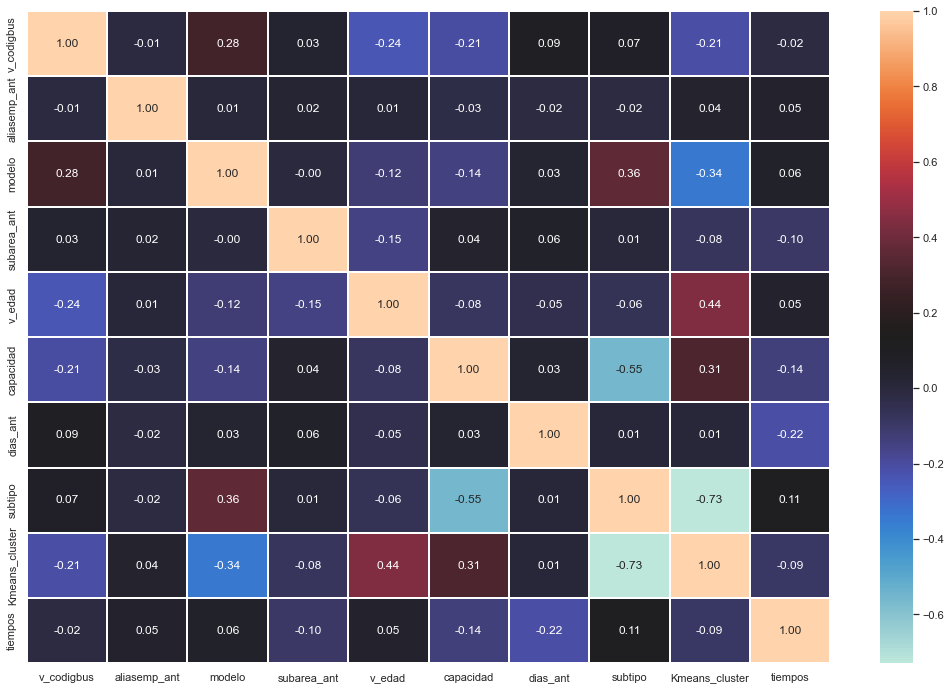

In [173]:
#Transformaciones
import math


#new_df['ndias_ant_subarea_2']=np.sqrt((new_df['ndias_ant_subarea']))
#new_df['subarea_ant_2']=((new_df['subarea_ant'])**2)
#new_df['dias_ant_2']=np.sqrt((new_df['dias_ant']))
#new_df['aliasemp_ant_2']=1/((new_df['aliasemp_ant']))
#new_df['capacidad_2']=np.cbrt((new_df['capacidad']))




f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(new_df.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones2.png')

se comprueban los missing por si las transformaciones han creado missing en el caso de hacerse

In [174]:
round(new_df.isna().sum() * 100 / len(new_df),2)

v_codigbus        0.0
aliasemp_ant      0.0
modelo            0.0
subarea_ant       0.0
v_edad            0.0
capacidad         0.0
dias_ant          0.0
subtipo           0.0
Kmeans_cluster    0.0
tiempos           0.0
dtype: float64

In [175]:
new_df.columns

Index(['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'dias_ant', 'subtipo', 'Kmeans_cluster', 'tiempos'],
      dtype='object')

In [176]:


newdf=new_df[features]

# Division del dataset
Se dividen en subconjuntos de entrenamiento y pureba

In [177]:

X_train, X_test, y_train, y_test = train_test_split(
                                        newdf.drop(columns = 'tiempos'),
                                        newdf['tiempos'],
                                        test_size=0.25,
                                        random_state = 123
                                    )



In [178]:
X_train.shape

(971, 9)

se cargan las librerias para  balancear los datos si fuese necesario

In [179]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.combine import SMOTETomek 
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.under_sampling import NearMiss 


# Modelado

Se cargan las librerias para la generación de modelos

In [180]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, make_scorer,accuracy_score,roc_auc_score, mean_absolute_error, mean_squared_error,r2_score

#‘neg_mean_absolute_error’
#‘neg_mean_squared_error’
#‘neg_root_mean_squared_error’
#'accuracy'
#'f1'
#'roc_auc'

## Iteraciones

In [192]:
iteraciones=100000

# RandomForestClassifier

Obtenemos el mejor de los resultados sin balancear el data set para el Random Forest ya que gener aun bajo numero de errores cuando se equivoca al predecir 'entre 2 y 6 meses' y 'mas de 6 meses' y por criterio experto es mejor que prediga erroneamente 'entre 0 y 2 meses'

### Parametros

In [199]:

parameters_RF={'bootstrap': [True, False],
               'criterion':['gini', 'entropy'],
               'max_depth': np.arange(2,200,1), 
               'min_samples_leaf': np.arange(2,10,1),
               'min_samples_split':  np.arange(2,10,1),
               'max_features':['auto', 'sqrt', 'log2'],
               #'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators':np.arange(20,100,1)
            }
            
parameters_RF_grid={'bootstrap': [True],
               'criterion':['entropy'],
               'max_depth': np.arange(2,20,1), 
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               'max_features':['auto'],
               #'class_weight':['balanced', 'balanced_subsample'],
               'n_estimators':np.arange(20,150,1)
            }

In [194]:
RF=RandomForestClassifier(random_state=0)
ran_RF=RandomizedSearchCV(RF,parameters_RF,cv=5,scoring='accuracy',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_RF.fit(X_train,y_train)

Fitting 5 folds for each of 100000 candidates, totalling 500000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,...
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6

In [195]:
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))
print("CV score=%0.3f" % ran_RF.best_score_)
cv_results = ran_RF.cv_results_

Best parameters from Randomsearch: {'n_estimators': 52, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'entropy', 'bootstrap': True}
CV score=0.565


MOTOR
RandomSearch

Best parameters from Randomsearch: {'n_estimators': 52, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'entropy', 'bootstrap': True}

RandomForestClassifier 

TRAIN 
Best score ACC=0.5654


PREDICCIÓN  

ACC prediction:  0.5555555555555556


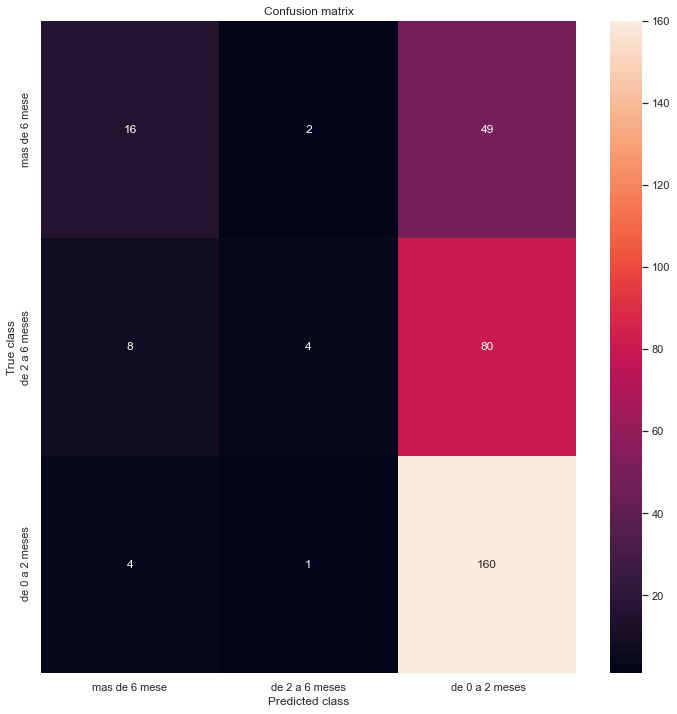

              precision    recall  f1-score   support

           1       0.57      0.24      0.34        67
           2       0.57      0.04      0.08        92
           3       0.55      0.97      0.70       165

    accuracy                           0.56       324
   macro avg       0.57      0.42      0.37       324
weighted avg       0.56      0.56      0.45       324





Importancia RandomForestRegressor:
            feature  importancia
0      v_codigbus     0.113511
1    aliasemp_ant     0.105402
2          modelo     0.092958
3     subarea_ant     0.108259
4          v_edad     0.091879
5       capacidad     0.154211
6        dias_ant     0.297946
7         subtipo     0.017976
8  Kmeans_cluster     0.017859




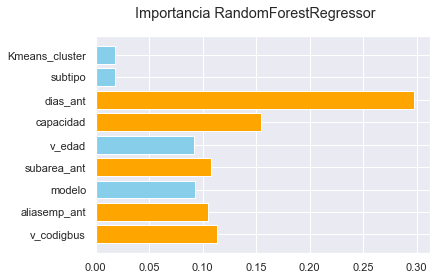

In [201]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))

print('\nRandomForestClassifier \n\nTRAIN ')
print("Best score ACC=%0.4f" % ran_RF.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_RF.best_params_
RF_ran = RandomForestClassifier(random_state=0,bootstrap= model['bootstrap'],
                               #class_weight=model['class_weight'],
                               criterion=model['criterion'],
                               max_depth=model['max_depth'],
                               max_features=model['max_features'],
                               min_samples_leaf=model['min_samples_leaf'],
                               min_samples_split=model['min_samples_split'],
                               n_estimators=model['n_estimators'])



#Predicción
RF_ran.fit(X_train,y_train)
y_pred = RF_ran.predict(X_test)

acc_RF = accuracy_score(y_test, y_pred)
print ('PREDICCIÓN  \n')
print ('ACC prediction: ', acc_RF)

labels=df_tiempos.tiempos
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

mostrar_resultados(y_test, y_pred)

#print(classification_report(y_test, y_pred))
print('\n')

  


print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia RandomForestRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia RandomForestRegressor ')
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_RF = pd.DataFrame({ 'date': X_test.index,'Real': (y_test), 'Predicho': (y_pred)})

In [204]:
RF=RandomForestClassifier(random_state=0)
grid_RF=GridSearchCV(RF,parameters_RF_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1) 
grid_RF.fit(X_train,y_train)

Fitting 5 folds for each of 56160 candidates, totalling 280800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto'],
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 20,  21,  22,  23,  24,  25,  26,  27,  2...
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 

In [205]:
print("Best parameters from Randomsearch: {}".format(grid_RF.best_params_))
print("CV score=%0.3f" % grid_RF.best_score_)
cv_results = grid_RF.cv_results_

Best parameters from Randomsearch: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 56}
CV score=0.567


MOTOR
RandomSearch

Best parameters from Randomsearch: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 56}

RandomForestClassifier 

TRAIN 
Best score ACC=0.5674


PREDICCIÓN  

ACC prediction:  0.5555555555555556


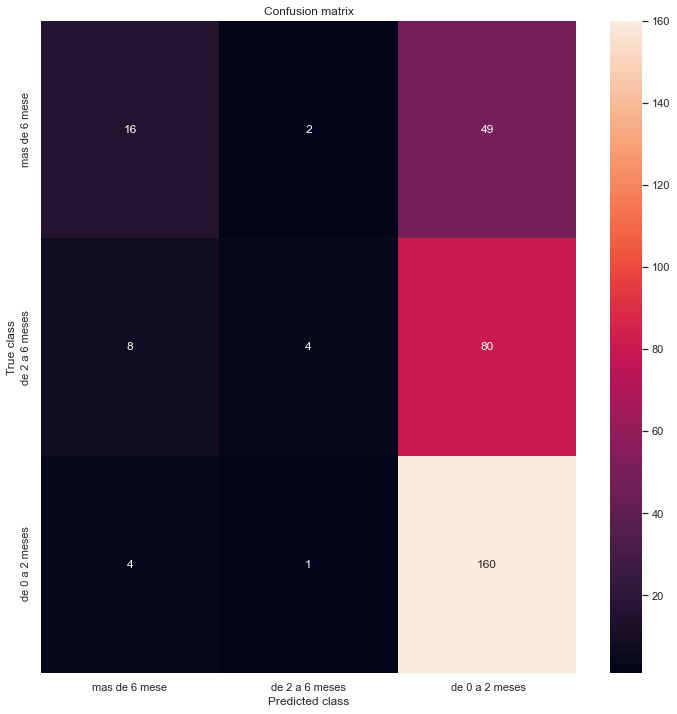

              precision    recall  f1-score   support

           1       0.57      0.24      0.34        67
           2       0.57      0.04      0.08        92
           3       0.55      0.97      0.70       165

    accuracy                           0.56       324
   macro avg       0.57      0.42      0.37       324
weighted avg       0.56      0.56      0.45       324





Importancia RandomForestRegressor:
            feature  importancia
0      v_codigbus     0.112471
1    aliasemp_ant     0.113262
2          modelo     0.085561
3     subarea_ant     0.107146
4          v_edad     0.083415
5       capacidad     0.158379
6        dias_ant     0.302650
7         subtipo     0.019670
8  Kmeans_cluster     0.017446




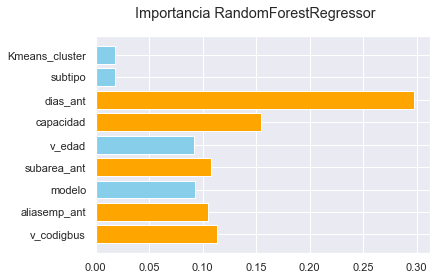

In [206]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(grid_RF.best_params_))

print('\nRandomForestClassifier \n\nTRAIN ')
print("Best score ACC=%0.4f" % grid_RF.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=grid_RF.best_params_
RF_grid = RandomForestClassifier(random_state=0,bootstrap= model['bootstrap'],
                               #class_weight=model['class_weight'],
                               criterion=model['criterion'],
                               max_depth=model['max_depth'],
                               max_features=model['max_features'],
                               min_samples_leaf=model['min_samples_leaf'],
                               min_samples_split=model['min_samples_split'],
                               n_estimators=model['n_estimators'])



#Predicción
RF_grid.fit(X_train,y_train)
y_pred = RF_ran.predict(X_test)

acc_RF = accuracy_score(y_test, y_pred)
print ('PREDICCIÓN  \n')
print ('ACC prediction: ', acc_RF)

labels=df_tiempos.tiempos
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

mostrar_resultados(y_test, y_pred)

#print(classification_report(y_test, y_pred))
print('\n')

  


print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_grid.feature_importances_})

print('Importancia RandomForestRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia RandomForestRegressor ')
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_RF = pd.DataFrame({ 'date': X_test.index,'Real': (y_test), 'Predicho': (y_pred)})

In [207]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'TERMINADO'+'\n')

anexos:
    https://github.com/SoftDani/Notebooks/tree/main/TFM

df_motor.to_csv(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\df_560_480.csv', index = False)

with pd.ExcelWriter(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\df_560_480.xlsx') as writer:  
    df_motor.to_excel(writer, sheet_name='Dataset limpio')
    df_norm.to_excel(writer, sheet_name='dataset normalizado')

with pd.ExcelWriter(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\df_codificacion.xlsx') as writer:  
    df_tiempos.to_excel(writer, sheet_name='tiempos')
    df_subarea_ant.to_excel(writer, sheet_name='subarea anterior')
    df_v_codigbus.to_excel(writer, sheet_name='Codigo de autobus')
    df_aliasemp.to_excel(writer, sheet_name='alias empleado')
    df_marca.to_excel(writer, sheet_name='marca')
    df_modelo.to_excel(writer, sheet_name='modelo')
    df_tipo.to_excel(writer, sheet_name='tipo')
    df_subtipo .to_excel(writer, sheet_name='subtipo')